## PCS5024 - Aprendizado Estatístico
 - Primeiro trimestre 2023 
 - Profs. Anna Helena Realli Costa e Fábio Gagliardi Cozman 
 - Aluno: Caio Azevedo - caio.aze@alumni.usp.br
 - Entrega em: 09.05.23

## Classification with the Adult dataset
To be handed until May 9 in edisciplinas: a write-up, five pages long at most, in pdf format, describing the results obtained in the following task:

1) Get the dataset Adult (either in the UCI Repository or in Kaggle).

2) Analyze features, missing data, and overall characteristics of the dataset (using tools in sklearn). Select features, discretize numerical features, handle missing data. 

3) Build a kNN classifier to predict class variable ">50k" (that is, whether person gets more than US$50k/year or not). Select the hyperparameter using cross-validation; test the final classifier using a holdout dataset.

4) Repeat (3) using three other classification techniques (for instance, neural network, classification tree, random forest, boosted trees, SVM, Naive Bayes).

5) Present accuracy, precision and recall for the best classifier in (3) and in (4).

## Objetivo
 - Análise para classificação das pessoas que ganham mais de U$50k por ano. 
 - **Projeto Classificação Binária**

## Sobre o dataset

### Características descritivas
| Data Set Characteristics | Number of Instances | Attribute Characteristics | Number of Attributes | Associated Tasks | Missing Values? 
| --- | --- | --- | --- | --- | --- 
| Multivariate | 48842 | Categorical, Integer | 14 | Classification | Yes 

### Sobre os atributos

- **salary** (target): >50K, <=50K.

- **age**: continuous.
- **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt**: continuous.
- **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - -  - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num**: continuous.
- **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex**: Female, Male.
- **capital-gain**: continuous.
- **capital-loss**: continuous.
- **hours-per-week**: continuous.
- **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Referências:
 - https://archive.ics.uci.edu/ml/datasets/adult
 - https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
 - http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html
 - http://www.cs.toronto.edu/~delve/data/adult/desc.html
 - https://www.scaler.com/topics/data-science/categorical-missing-values/ 
 - https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python (sobre null accuracy)
 
 
 **Sobre balanceamento e classificação**
 - https://machinelearningmastery.com/imbalanced-classification-with-the-adult-income-dataset/
 - https://medium.com/analytics-vidhya/handle-missing-values-in-categorical-features-b7c5b073dda2
 **Sobre os modelos**
 - https://realpython.com/knn-python/
 - https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

 boas implementações
 - https://www.kaggle.com/code/bhupendrarajput/complete-eda-and-machine-learning
 - https://arxiv.org/ftp/arxiv/papers/1810/1810.10076.pdf
 - https://github.com/itdxer/adult-dataset-analysis

## Implementação

### Importação bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTENC
from sklearn import set_config
set_config(display="diagram")

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [5]:
import os, sys
from collections import Counter
import missingno as msno
from sklearn.impute import SimpleImputer
%matplotlib inline

In [6]:
from functools import partial
from collections import defaultdict

import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn import metrics

### Constantes

In [7]:
#'https://raw.githubusercontent.com/Bhupendra1770/Adult-Census-Income-Prediction/main/adult.csv'
APP_PATH = os.getcwd()
DATA_DIR = os.path.join(APP_PATH, 'data')
TRAIN_DATA_FILE = os.path.join(DATA_DIR, 'adult.data.csv')
TEST_DATA_FILE = os.path.join(DATA_DIR, 'adult.test.csv')
target_column = "income"

### Considerações para implementação do classificador

- O atributo fnlwgt foi removido para implementação da classificação, seja porque sua definição não agrega valor à predição, seja pela análise estatística que provou sua baixa correlação ao atributo target.
- O atributo education-num também foi removido pois seu valor já está representado com o atributo education.
- O atributo native-country foi transformado em um atributo binário chamado fromUS, cujo valor será 1 quando native_country for igual a United-States e 0 caso contrário.
- Para o atributo education, as categorias de menor instrução, abaixo do colegial (high school ou 'HS-grad'), foram agrupadas em uma única classe ('School')
- Registros duplicados e impossíveis de classificar também foram removidos da amostra de treino e testes.
- Deve-se testar pelo menos duas abordagens para tratamento dos registros com NaN e utilizar o de melhor desempenho do classificador.
- O atributo target deve ser tratado e seu valor convertido em 1 ou 0
- Foram utilizados sete classificadores para resolução do problema, são eles, __KNN__, __Regressão Logística__, os algoritmos de classificação baseado em árvores de decisão __LightGBM__, __XGBoost__ e __Random Forest__, __SVM__, __Redes Neurais__ do tipo Multilayer Perceptron (MLP) e por fim __Naive Bayes__ (GaussianNB).
- Como o objetivo é identificar o classificador de melhor desempenho, todos os dados foram tratados da mesma forma antes de submetê-los aos classificadores.
- Para cada classificador a seleção dos hiperparâmetros foi feito por meio da ferramenta __GridSearchCV__ que é comumente utilizada pela comunidade python para automatizar o processo de ajuste dos parâmetros de um algoritmo, pois ele faz de forma sistemática diversas combinações dos parâmetros e depois de avaliá-los os armazenará num único objeto. Dentre outras configurações dessa ferramenta, fizemos uso da __validação cruzada__ com 5 folds para os dados de treino.
- Para cada classificador foi selecionado um conjunto de hiperparâmetros e respectivos valores possíveis para os devidos ajustes pelo GridSearchCV.
- A identificação do melhor classificador será feito com base nas métricas: __Acurácia__, __Precisão__ e __Recall__ (F1-Score), sobre os dados de homologação.
- Considerando que as classes do dataset estão desbalanceadas, onde temos ~24% do tipo 1 (>50k) e 76% tipo 0 (=<50k). Optou-se pela otimização do threshold (probabilidade de classificação de cada registro do dataset) que visa maximizar as três métricas adotadas como critério de seleção. Para isso foi feito uso da curva Precision-Recall e seu melhor _threshold_, e assim computamos as métricas acurácia, precisão e recall.

### Gráficos das métricas

In [8]:
from IPython.display import Markdown, display
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [9]:
def plot_ROC_curves(fpr, tpr,roc_auc):

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.xlabel('Taxa de Falso Positivo')
    plt.title('Curva ROC do classificador')
    
    plt.show()

In [10]:
def plot_Precision_Recall_curves(precision,recall,y,optimal_idx):

    # plot the roc curve for the model
    no_skill = len(y[y==1]) / len(y)
    plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
    #plt.xlim([0, 1])
    #plt.ylim([0, 1])
    plt.plot(recall, precision, marker='.', label='Logistic')
    plt.scatter(recall[optimal_idx], precision[optimal_idx], marker='o', color='black', label='Best')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    # show the plot
    plt.show()

In [11]:
def plot_confusion_matrix_and_evaluation_metrics(actual,prediction):
    cm = confusion_matrix(actual,prediction)
 
    #Plot the confusion matrix.
    sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['>50k','<50k'],
            yticklabels=['>50k','<50k'])
    plt.ylabel('Previsto',fontsize=13)
    plt.xlabel('Real',fontsize=13)
    plt.title('Matriz de Confusão',fontsize=17)
    plt.show()

In [12]:
def check_feature_importance(linear_classifier, feature_names):
    xs = np.arange(len(feature_names))
    plt.title("Importancia das variáveis (para o último fold)")
    plt.barh(xs, linear_classifier.coef_[0])
    plt.yticks(xs, feature_names)

In [13]:
def plot_precision_recall_curves(pr_curves):
    curves = []
    for precision, recall in pr_curves:
        curve, = plt.plot(recall, precision)
        curves.append(curve)
        
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.legend(curves, ['Fold #{}'.format(i) for i in range(1, len(curves) + 1)])
    plt.tight_layout()

In [14]:
def plot_f1_curves(f1_curves, thresholds):
    curves = []
    for f1_values in f1_curves:
        curve, = plt.plot(thresholds, f1_values)
        curves.append(curve)

    plt.legend(curves, ['Fold #{}'.format(i) for i in range(1, len(curves) + 1)])
    plt.ylabel('F1')
    plt.xlabel('Threshold da classificação')
    plt.tight_layout()

In [15]:
def plot_kappa_curves(kappa_curves, thresholds):
    curves = []
    for kappa_values in kappa_curves:
        curve, = plt.plot(thresholds, kappa_values)
        curves.append(curve)

    plt.legend(curves, ['Fold #{}'.format(i) for i in range(1, len(curves) + 1)])
    plt.ylabel('Kappa')
    plt.xlabel('Threshold da classificação')
    plt.tight_layout()

In [16]:
# Code from: https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter2_MorePyMC/separation_plot.py
# Code was reformated in order to fit better into general code style
def separation_plot( p, y, **kwargs ):
    """
    This function creates a separation plot for logistic and probit classification. 
    See http://mdwardlab.com/sites/default/files/GreenhillWardSacks.pdf
    
    p: The proportions/probabilities, can be a nxM matrix which represents M models.
    y: the 0-1 response variables.
    
    """
    p = p.flatten()
    y = y.flatten()
    n = p.size

    colors_bmh = np.array(["#eeeeee", "#348abd"])
    ix = np.argsort(p)
    ax = plt.gca()

    # plot the different bars
    bars = ax.bar(
        np.arange(n),
        np.ones(n),
        width=1.,
        color=colors_bmh[y[ix].astype(int)], 
        edgecolor='none'
    )
    ax.plot(
        np.arange(n + 1),
        np.append(p[ix], p[ix][-1]),
        "k",
        linewidth=1.,
        drawstyle="steps-post"
    )

    # create expected value bar.
    ax.vlines([(1 - p[ix]).sum()], [0], [1])
    plt.xlim(0, n)
        
    plt.tight_layout()

### Validação dos modelos

In [17]:
#https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
def show_precision_recall_curve_and_default_metrics(_model, model_name,X, y):
    predictions = _model.predict(X)
    np.seterr(invalid='ignore')    
    if not isinstance(model, SVC):
        y_scores = _model.predict_proba(X)
        # calculate roc curves
        precision, recall, thresholds = precision_recall_curve(y, y_scores[:, 1]) ##pega probabilidade da classe 1
        # convert to f score
        fscore = (2 * precision * recall) / (precision + recall)
        fscore[np.isnan(fscore)] = 0
        # locate the index of the largest f score
        optimal_idx = np.argmax(fscore)
        optimal_threshold = thresholds[optimal_idx]
        precal_predictions = [1 if i >= optimal_threshold else 0 for i in y_scores[:, -1]]
        #print(classification_report(y, predictions))
        #print()
        #plot_confusion_matrix_and_evaluation_metrics(y, predictions)
        #print()
        plot_Precision_Recall_curves(precision, recall,y,optimal_idx)
        printmd("Threshold ideal: {:.2f} para curva Precision x Recall,F-Score={:.2f}".format(thresholds[optimal_idx], fscore[optimal_idx]))
    else:
        precal_predictions = predictions
        printmd("Threshold **não se aplica** para SVC", color="red")
        
    #print('Melhor Threshold=%f, F-Score=%.3f' % (thresholds[optimal_idx], fscore[optimal_idx]))
    print()
    printmd("**Acurácia** antes e depois do *thresholding*: {:.2f}, {:.2f}".format(accuracy_score(y, predictions), accuracy_score(y, precal_predictions)))
    printmd("**Precisão** antes e depois do  *thresholding*: {:.2f}, {:.2f}".format(precision_score(y, predictions), precision_score(y, precal_predictions)))
    printmd("**Recall** Score antes e depois do *thresholding*: {:.2f}, {:.2f}".format(recall_score(y, predictions), recall_score(y, precal_predictions)))
    printmd("**F1 Score** antes e depois do *thresholding*: {:.2f}, {:.2f}".format(f1_score(y, predictions), f1_score(y, precal_predictions)))
    printmd("**ROC Score** antes e depois do *thresholding*: {:.2f}, {:.2f}".format(roc_auc_score(y, predictions), roc_auc_score(y, precal_predictions)))
    #printmd("**bold and blue** cdcd", color="blue")
    
    #print(_model.best_estimator_[1])
    model_results.append((model_name, accuracy_score(y, precal_predictions),roc_auc_score(y, precal_predictions),f1_score(y, precal_predictions)))
    

In [18]:
def show_ROC_and_default_metrics(_model, X, y):
    predictions = _model.predict(X)
    np.seterr(invalid='ignore')
    if not isinstance(model, SVC):
        y_scores = _model.predict_proba(X)
        fpr, tpr, threshold = roc_curve(y, y_scores[:, 1])
        roc_auc = auc(fpr, tpr)
        optimal_idx = np.argmax(tpr - fpr)
        optimal_threshold = threshold[optimal_idx]
        roc_predictions = [1 if i >= optimal_threshold else 0 for i in y_scores[:, -1]]
    else:
        roc_predictions = predictions
        printmd("Threshold **não se aplica** para SVC", color="red")
    
    print(classification_report(y, predictions))
    print()
    plot_confusion_matrix_and_evaluation_metrics(y, predictions)
    print()
    if not isinstance(model, SVC):
        plot_ROC_curves(fpr, tpr,roc_auc)
        print("Threshold ideal: {:.2f} para curva ROC".format(optimal_threshold))
        print()
    printmd("**Acurácia** antes e depois do *thresholding*: {:.2f}, {:.2f}".format(accuracy_score(y, predictions), accuracy_score(y, roc_predictions)))
    printmd("**Precisão** antes e depois do  *thresholding*: {:.2f}, {:.2f}".format(precision_score(y, predictions), precision_score(y, roc_predictions)))
    printmd("**Recall** Score antes e depois do *thresholding*: {:.2f}, {:.2f}".format(recall_score(y, predictions), recall_score(y, roc_predictions)))
    printmd("**F1 Score** antes e depois do *thresholding*: {:.2f}, {:.2f}".format(f1_score(y, predictions), f1_score(y, roc_predictions)))
    printmd("**ROC Score** antes e depois do *thresholding*: {:.2f}, {:.2f}".format(roc_auc_score(y, predictions), roc_auc_score(y, roc_predictions)))
    #printmd("**bold and blue** cdcd", color="blue")

In [19]:
def tunning_models(model, param_pipeline):
    pipeline = make_pipeline(columnTransformer, model)
    #print(pipeline.get_params().keys())
    
    gridsearch = GridSearchCV(pipeline, param_grid=param_pipeline, cv=5,verbose = 20, scoring='accuracy', refit = True)
    gridsearch.fit(X_train, y_train)
    
    #print(gridsearch.best_params_)
    #print(gridsearch.best_estimator_)
    #gridsearchbest_model.cv_results_
    print("") 
    print("---------------- DESEMPENHO DADOS DE TREINO--------------") 
    y_pred = gridsearch.predict(X_train)
    print(classification_report(y_train, y_pred))
    #plot_confusion_matrix_and_evaluation_metrics(y_train,y_pred)
    
    #y_pred = gridsearch.predict(X_test)
    #print(classification_report(y_test, y_pred))
    #plot_confusion_matrix_and_evaluation_metrics(y_test,y_pred)
    
    return gridsearch

In [20]:
def collect_metrics(fold_metrics, actual, predicted_proba, thresholds):
    kappa_score = partial(metrics.cohen_kappa_score, actual)
    
    fold_metrics['roc_scores'].append(metrics.roc_auc_score(actual, predicted_proba))
    fold_metrics['f1_scores'].append(metrics.f1_score(actual, predicted_proba.round()))
    fold_metrics['kappa'].append(kappa_score(predicted_proba.round()))
    fold_metrics['accuracy'].append(metrics.accuracy_score(actual, predicted_proba.round()))
    fold_metrics['precision'].append(metrics.precision_score(actual, predicted_proba.round()))
    fold_metrics['recall'].append(metrics.recall_score(actual, predicted_proba.round()))

    precision, recall, _ = metrics.precision_recall_curve(actual, predicted_proba)
    kappa_values = [kappa_score(predicted_proba > threshold) for threshold in thresholds]
    f1_values = [metrics.f1_score(actual,  predicted_proba > threshold) for threshold in thresholds]
    
    fold_metrics['pr_curves'].append((precision, recall))
    fold_metrics['kappa_curves'].append(kappa_values)
    fold_metrics['f1_curves'].append(f1_values)
    
def print_last_fold_stats(fold_metrics):
    print("ROC AUC score : {:.3f}".format(fold_metrics['roc_scores'][-1]))
    print("Kappa score   : {:.3f}".format(fold_metrics['kappa'][-1]))
    print("F1 score      : {:.3f}".format(fold_metrics['f1_scores'][-1]))
    print("Accuracy      : {:.3f}".format(fold_metrics['accuracy'][-1]))
    print("Precision      : {:.3f}".format(fold_metrics['precision'][-1]))
    print("Recall      : {:.3f}".format(fold_metrics['recall'][-1]))

def validate_model(model, X, y):
    kfold = KFold(n_splits=4, shuffle=True)
    fold_metrics= defaultdict(list)
    thresholds = np.arange(0.1, 1, 0.1)
    
    for i, (train_index, valid_index) in enumerate(kfold.split(X), start=1):
        x_train, x_valid = X[train_index], X[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]

        if isinstance(model, lgb.LGBMClassifier):
            # From the LGB we can get plot that shows progress
            # for training and validation data.
            # We don't show it, but information can be available
            # from the model.
            model.fit(
                x_train, y_train,
                eval_set=[(x_train, y_train), (x_valid, y_valid)],
                verbose=False,
            )
        else:
            model.fit(x_train, y_train)

        x_predicted_probas = model.predict_proba(x_valid)
        x_predicted_proba = x_predicted_probas[:, 1]

        collect_metrics(fold_metrics, y_valid, x_predicted_proba, thresholds)
        
        print("Fold #{}".format(i))
        print_last_fold_stats(fold_metrics)
        print('-' * 30)
        
    print("")
    print("ROC AUC médio entre os folds  : {:.3f}".format(np.mean(fold_metrics['roc_scores'])))
    print("Kappa médio entre os folds    : {:.3f}".format(np.mean(fold_metrics['kappa'])))
    print("F1 médio entre os folds       : {:.3f}".format(np.mean(fold_metrics['f1_scores'])))
    print("Acurácia média entre os folds : {:.3f}".format(np.mean(fold_metrics['accuracy'])))
    print("Precision média entre os folds : {:.3f}".format(np.mean(fold_metrics['precision'])))
    print("Recall média entre os folds : {:.3f}".format(np.mean(fold_metrics['recall'])))
    
    
    plt.figure(figsize=(14, 8))
    
    plt.subplot(221)
    plt.title("Separation plot for last fold")
    separation_plot(x_predicted_proba, y_valid)
    
    plt.subplot(222)
    plt.title("Curvas Precision-recall")
    plot_precision_recall_curves(fold_metrics['pr_curves'])
    
    plt.subplot(223)
    plt.title("Kappa para os diferentes thresholds")
    plot_kappa_curves(fold_metrics['kappa_curves'], thresholds)
    
    plt.subplot(224)
    plt.title("F1 para os diferentes thresholds")
    plot_f1_curves(fold_metrics['f1_curves'], thresholds)

    plt.show()

### Funções de Encoding

In [21]:
def get_categorical_columns(data, cat_columns=None, fillna=True):
    if cat_columns is None:
        cat_data = data.select_dtypes('category')
    else:
        cat_data = data[cat_columns]

    if fillna:
        for colname, series in cat_data.iteritems():
            if 'Other' not in series.cat.categories:
                series = series.cat.add_categories(['Other'])

            cat_data[colname] = series.fillna('Other')
            
    return cat_data

In [22]:
#https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/
def features_with_one_hot_encoded_categories(data, num_columns, cat_columns=None, fillna=True):
    #numerical_data = data[num_columns]
    cat_data = data[cat_columns]
    one_hot_data = pd.get_dummies(cat_data) #trocar por onehot com objeto instanciado fora da função e chamado aqui. 
    df = pd.concat([data, one_hot_data], axis=1)
    
    #data[num_columns] = MinMax(data[num_columns])
    features = num_columns + one_hot_data.columns.tolist()

    X = df[features].fillna(0).values.astype(float)
    y = df[target_column].values
    
    return X, y

In [23]:
def features_with_labeled_categories(data, num_columns, cat_columns=None, fillna=True):
    #cat_data = get_categorical_columns(data, cat_columns, fillna)
    cat_data = data[cat_columns]
    cat_labeled_data = cat_data.apply(lambda x: x.cat.codes)
    
    numerical_data = data[num_columns]
    
    if fillna:
        numerical_data = numerical_data.fillna(0)
    
    X = np.concatenate([
        numerical_data.values.astype(float),
        cat_labeled_data.values,
    ], axis=1)
    y = data[target_column].values

    feature_names = num_columns + cat_data.columns.tolist()
    return X, y, feature_names

In [24]:
#normalização das features do dataset
def MinMax(Dset):
    scaler = preprocessing.MinMaxScaler()
    return scaler.fit_transform(Dset)

### Leitura e tratamento das amostras

In [25]:
def read_dataset(path):
    return pd.read_csv(
        path,
        index_col=None,
        comment='|',  
        skipinitialspace=True,  
        na_values={
            'capital-gain': 99999,
            'workclass': '?',
            'native-country': '?',
            'occupation': '?',
        },
    )

def clean_dataset(data):

    #remove eventuais espaços vazios no inicio e/ou fim das colunas do tipo string 'object'
    for i in data.columns:
        if data[i].dtype=='object':
            data[i] = data[i].str.strip()
            #data[i] = data[i].astype("category")

    # Por algum motivo o dataset de teste tem um ponto (.) no final do atributo target, sendo necessário remove-lo
    data[target_column] = data.income.str.rstrip('.')
    
    # Remoção das colunas colunas abaixo, pois entendemos que elas não são 
    # relevantes para classificação.
    data = data.drop('fnlwgt', axis=1)
    data = data.drop('education-num', axis=1)
    #data = data.drop('capital-gain', axis=1)
    #data = data.drop('capital-loss', axis=1)
    
    # Registros duplicados podem gerar viés na analise e classificação, 
    # logo devem ser removidos
    data = data.drop_duplicates()
    
    # "Binariza" o atributo target  (>50K == 1 e <=50K == 0)
    data[target_column] = (data[target_column] == '>50K').astype(int)

    return data

#train_data = clean_dataset(read_dataset(TRAIN_DATA_FILE))
#test_data = clean_dataset(read_dataset(TEST_DATA_FILE))

#data = train_data

In [26]:
def mergedataset(train_data, test_data):
    train_data['is_test'] = 0
    test_data['is_test'] = 1
    data = pd.concat([train_data, test_data])
    return data

In [27]:
def deduplicate(merged_data):

    for i in merged_data.columns:
        if merged_data[i].dtype=='object':
            merged_data[i] = merged_data[i].str.strip()
            data[i] = data[i].astype("category")
    
    train_data = merged_data[merged_data.is_test == 0].drop('is_test', axis=1)
    test_data = merged_data[merged_data.is_test == 1].drop('is_test', axis=1)
    return train_data, test_data

In [28]:
train_data = clean_dataset(read_dataset(TRAIN_DATA_FILE))
test_data = clean_dataset(read_dataset(TEST_DATA_FILE))
print("Percentual da variável target positivas na amostra de treino: {:.2%}".format(np.mean(train_data.income)))
print("Percentual da variável target positivas na amostra de teste: {:.2%}".format(np.mean(test_data.income)))

Percentual da variável target positivas na amostra de treino: 24.78%
Percentual da variável target positivas na amostra de teste: 23.95%


In [29]:
data = mergedataset(train_data, test_data)
print("Total de registros da amostra: {:}".format(data.shape[0]))
print("Percentual da variável target positivas na amostra: {:.2%}".format(np.mean(data.income)))

Total de registros da amostra: 44355
Percentual da variável target positivas na amostra: 24.50%


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44355 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             44355 non-null  int64  
 1   workclass       41851 non-null  object 
 2   education       44355 non-null  object 
 3   marital-status  44355 non-null  object 
 4   occupation      41841 non-null  object 
 5   relationship    44355 non-null  object 
 6   race            44355 non-null  object 
 7   sex             44355 non-null  object 
 8   capital-gain    44113 non-null  float64
 9   capital-loss    44355 non-null  int64  
 10  hours-per-week  44355 non-null  int64  
 11  native-country  43502 non-null  object 
 12  income          44355 non-null  int32  
 13  is_test         44355 non-null  int64  
dtypes: float64(1), int32(1), int64(4), object(8)
memory usage: 4.9+ MB


<AxesSubplot:>

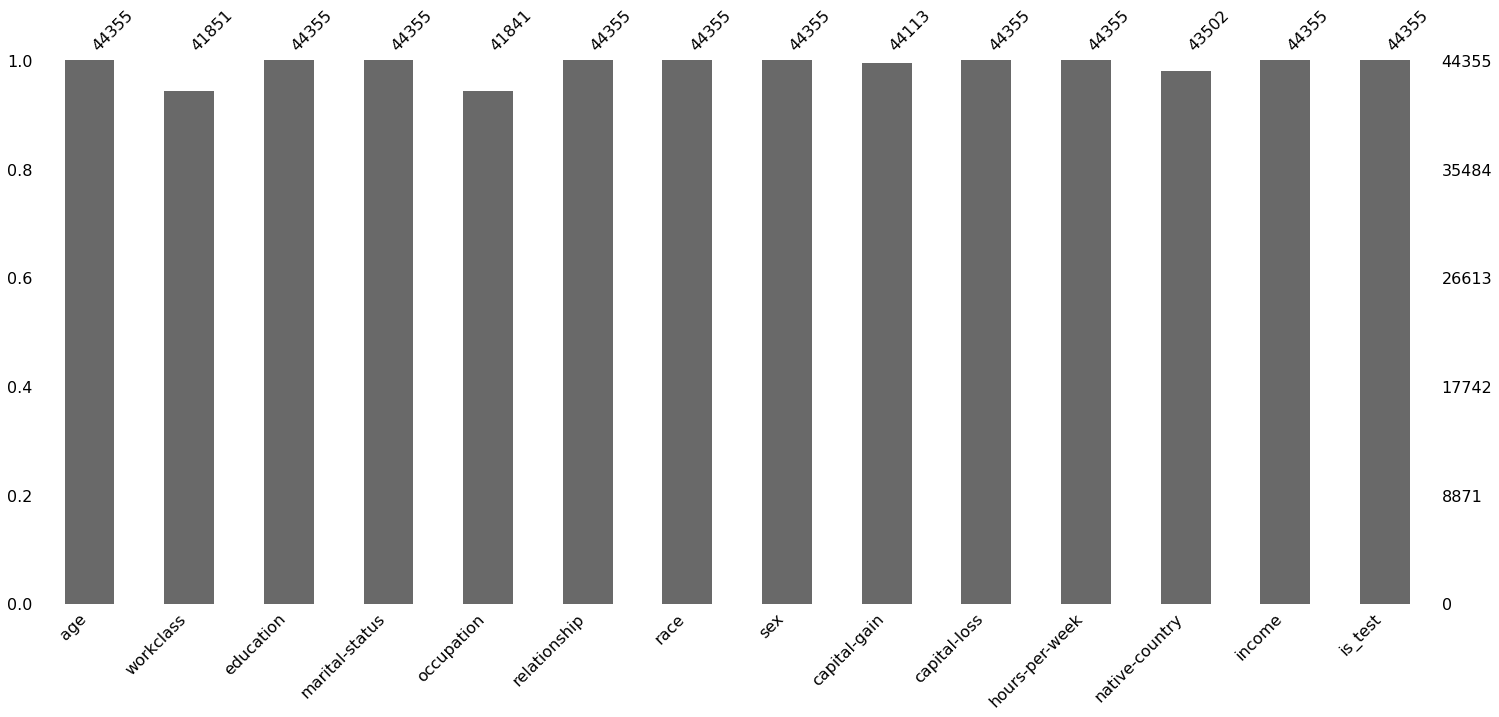

In [31]:
#visualiza a quantidade de registros nulos por atributo
msno.bar(data)

In [32]:
#total de registros nulos por atributo. 
data.isnull().sum()

age                  0
workclass         2504
education            0
marital-status       0
occupation        2514
relationship         0
race                 0
sex                  0
capital-gain       242
capital-loss         0
hours-per-week       0
native-country     853
income               0
is_test              0
dtype: int64

### Feature Engineering

#### Tratando dados faltantes
 - optamos por duas abordagens para o tratamento dos dados faltantes, visto que todos eles são categoricos.
 1. remoção dos registros que possuam pelo menos um dado faltante.
 2. preencher os dados faltantes pelo mais frequente na amostra (moda)
  
 - as abordagens 1 e 2 foram consideradas, uma vez que somente menos de 1% (30162/32561) da amostra possui dados faltantes.
 - para efeito de classificação, será considerada a abordagem que resultar no melhor desempenho dos modelos utilizados

In [33]:
#dropnulls | most_frequent | 
lang = "dropnulls"

match lang:
    case "dropnulls":
        data.dropna(axis=0, inplace=True)
        data.isnull().sum()
        print("nulos apagados")

    case "most_frequent":
        impute_mode = SimpleImputer(strategy = 'most_frequent')
        impute_mode.fit(data[['workclass', 'occupation','native-country']])
        data[['workclass', 'occupation','native-country']] = impute_mode.transform(data[['workclass', 'occupation','native-country']])
        print("nulos preenchidos com os registros mais frequentes")

    case _:
        # To perform KNN imputation, we need to normalize the input data and perform One Hot Encoding to categorical variables
        #from sklearn.impute import KNNImputer
        #imputer = KNNImputer(n_neighbors = 3)
        #df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
        #X = df.drop("workclass", axis=1).values
        #Y = df["workclass"].values
        #X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
        #forest = RandomForestClassifier(n_estimators=45, max_depth=25, random_state=False, max_features=0.6, min_samples_leaf=3, n_jobs=-1)
        #forest.fit(X_train, Y_train)
        print("nenhuma das opções válidas")

nulos apagados


<AxesSubplot:>

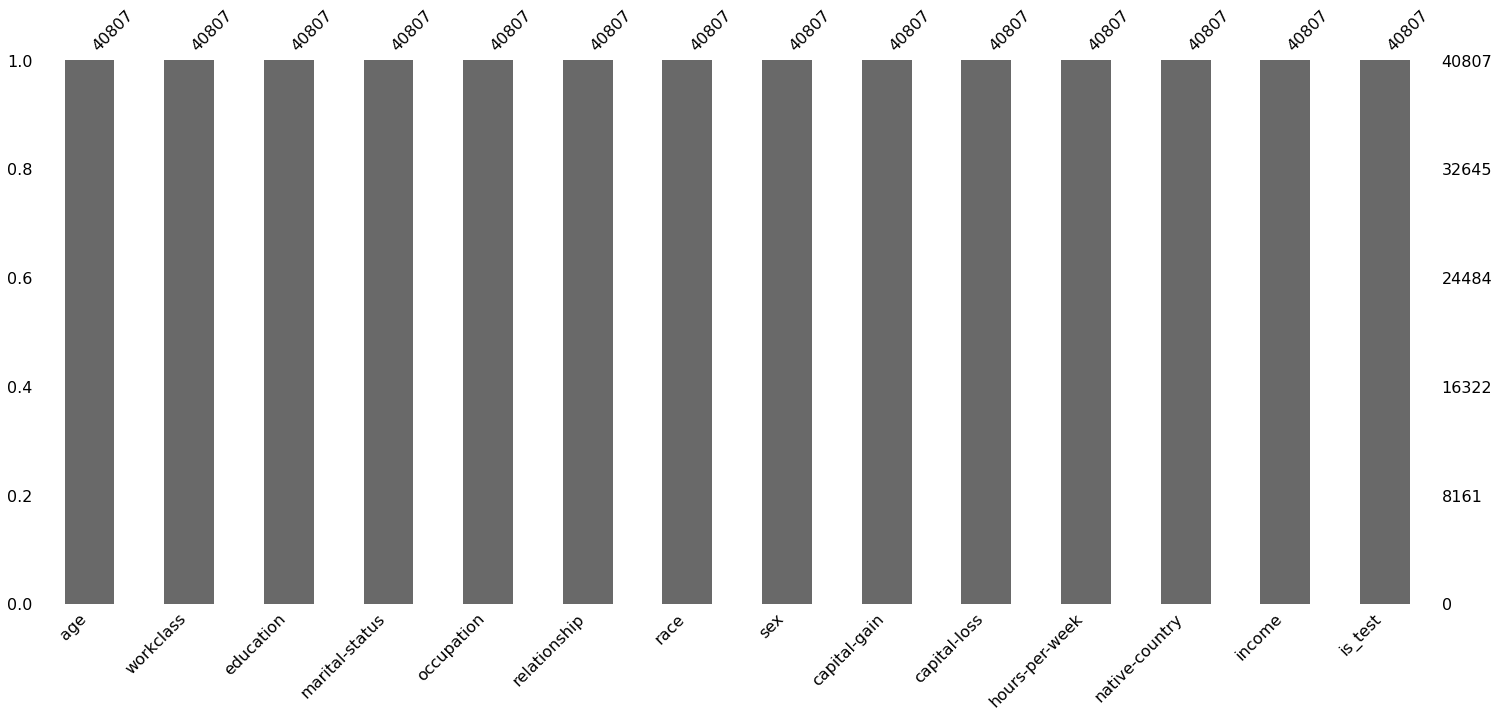

In [34]:
msno.bar(data)

#### Reestruturando atributos

In [35]:
data['fromUS'] = np.where(data['native-country'] == 'United-States', 'S', 'N').astype("object")
data = data.drop('native-country', axis=1)

- Atributo education: as categorias de menor instrução, abaixo do colegial (high school ou 'HS-grad'), sendo agrupadas em uma única classe ('School')

In [36]:
data['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)

#### Registros de classificação impossível

In [37]:
all_columns = data.columns.tolist()
#exclui as variáveis target e a de separação das amostras, antes de computar os registros n-plicados
predictor_columns = list(set(all_columns).difference([target_column,'is_test']))   
column_frequency = (data
    .groupby(predictor_columns, as_index=False)
    .agg({target_column: 'nunique'}))

column_frequency[column_frequency.income > 1].shape[0]

1050

In [38]:
column_frequency[column_frequency.income > 1]

relationship     sex  capital-gain  capital-loss     education  \
93         Husband    Male           0.0             0        School   
162        Husband    Male           0.0             0        School   
174        Husband    Male           0.0             0        School   
183        Husband    Male           0.0             0        School   
185        Husband    Male           0.0             0        School   
...            ...     ...           ...           ...           ...   
36844         Wife  Female           0.0             0  Some-college   
36845         Wife  Female           0.0             0  Some-college   
36935         Wife  Female           0.0             0  Some-college   
37063         Wife  Female           0.0             0  Some-college   
37069         Wife  Female           0.0             0  Some-college   

            occupation      marital-status  hours-per-week workclass   race  \
93        Craft-repair  Married-civ-spouse              35   Private  White   
162       Craft-repair  Married-civ-spouse              40   Private  White   
174       Craft-repair  Married-civ-spouse              40   Private  White   
183       Craft-repair  Married-civ-spouse              40   Private  White   
185       Craft-repair  Married-civ-spouse              40   Private  White   
...                ...                 ...             ...       ...    ...   
36844     Adm-clerical  Married-civ-spouse              40   Private  White   
36845     Adm-clerical  Married-civ-spouse              40   Private  White   
36935  Exec-managerial  Married-civ-spouse              50   Private  White   
37063            Sales  Married-civ-spouse              40   Private  White   
37069            Sales  Married-civ-spouse              40   Private  White   

       age fromUS  income  
93      42      S       2  
162     25      S       2  
174     32      S       2  
183     37      S       2  
185     38      S       2  
...    ...    ...     ...  
36844   40      S       2  
36845   41      S       2  
36935   47      S       2  
37063   28      S       2  
37069   38      S       2  

[1050 rows x 13 columns]

In [39]:
income_cnt = data.groupby(predictor_columns)[target_column].size()

In [40]:
income_cnt[income_cnt > 1]

relationship  sex     capital-gain  capital-loss  education     occupation       marital-status      hours-per-week  workclass         race                age  fromUS
Husband       Male    0.0           0              School       Adm-clerical     Married-civ-spouse  40              Private           White               38   S         2
                                                                Craft-repair     Married-civ-spouse  20              Self-emp-not-inc  White               59   S         2
                                                                                                     35              Private           White               42   S         2
                                                                                                     40              Private           Asian-Pac-Islander  54   N         2
                                                                                                                                       Black     

In [41]:
#exemplo de um dos registros de treino impossível de classificar
impossible = data[(data['hours-per-week']==70) & (data['education']=='Bachelors') & (data['occupation']=='Exec-managerial') \
      & (data['sex']=='Male') & (data['workclass']=='Private') & (data['age']==39) & (data['race']=='White') \
      & (data['fromUS']=='S') & (data['marital-status']=='Married-civ-spouse') & (data['relationship']=='Husband')]

impossible

age workclass  education      marital-status       occupation  \
6901   39   Private  Bachelors  Married-civ-spouse  Exec-managerial   
2818   39   Private  Bachelors  Married-civ-spouse  Exec-managerial   

     relationship   race   sex  capital-gain  capital-loss  hours-per-week  \
6901      Husband  White  Male           0.0             0              70   
2818      Husband  White  Male           0.0             0              70   

      income  is_test fromUS  
6901       0        0      S  
2818       1        1      S

In [42]:
predictor_columns

['relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'education',
 'occupation',
 'marital-status',
 'hours-per-week',
 'workclass',
 'race',
 'age',
 'fromUS']

In [43]:
#por não termos um critério seguro para manutenção das classificações n-plicadas, optamos por excluir todas elas.
data = data.drop_duplicates(subset=predictor_columns, keep=False)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34806 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             34806 non-null  int64  
 1   workclass       34806 non-null  object 
 2   education       34806 non-null  object 
 3   marital-status  34806 non-null  object 
 4   occupation      34806 non-null  object 
 5   relationship    34806 non-null  object 
 6   race            34806 non-null  object 
 7   sex             34806 non-null  object 
 8   capital-gain    34806 non-null  float64
 9   capital-loss    34806 non-null  int64  
 10  hours-per-week  34806 non-null  int64  
 11  income          34806 non-null  int32  
 12  is_test         34806 non-null  int64  
 13  fromUS          34806 non-null  object 
dtypes: float64(1), int32(1), int64(4), object(8)
memory usage: 3.9+ MB


In [45]:
print("Total de registros restantes na amostra: {:}".format(data.shape[0]))
print("Percentual da variável target positivas na amostra: {:.2%}".format(np.mean(data.income)))

Total de registros restantes na amostra: 34806
Percentual da variável target positivas na amostra: 24.29%


In [46]:
train_data, test_data = deduplicate(data)

In [47]:
print("Total de registros restantes na amostra de treino: {:}".format(train_data.shape[0]))
print("Total de registros restantes na amostra de teste: {:}".format(test_data.shape[0]))

Total de registros restantes na amostra de treino: 23312
Total de registros restantes na amostra de teste: 11494


In [48]:
print("Percentual da variável target positivas na amostra de treino: {:.2%}".format(np.mean(train_data.income)))
print("Percentual da variável target positivas na amostra de teste: {:.2%}".format(np.mean(test_data.income)))

Percentual da variável target positivas na amostra de treino: 24.50%
Percentual da variável target positivas na amostra de teste: 23.86%


In [49]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11494 entries, 0 to 16280
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             11494 non-null  int64   
 1   workclass       11494 non-null  category
 2   education       11494 non-null  category
 3   marital-status  11494 non-null  category
 4   occupation      11494 non-null  category
 5   relationship    11494 non-null  category
 6   race            11494 non-null  category
 7   sex             11494 non-null  category
 8   capital-gain    11494 non-null  float64 
 9   capital-loss    11494 non-null  int64   
 10  hours-per-week  11494 non-null  int64   
 11  income          11494 non-null  int32   
 12  fromUS          11494 non-null  category
dtypes: category(8), float64(1), int32(1), int64(3)
memory usage: 586.1 KB


In [50]:
data = data.reindex(columns=predictor_columns)

In [51]:
print("Total registros: {:d}, Treino: {:03d} e Teste: {:d}".format(data.shape[0], train_data.shape[0],test_data.shape[0]))

Total registros: 34806, Treino: 23312 e Teste: 11494


#### Identifica as covariáveis categóricas  e numéricas

In [52]:
# Armazena os atributos categóricos dentre os atributos preditores
cat_col=[]
for i in train_data.columns:
    if train_data[i].dtype=='category':
        cat_col.append(i)
cat_col

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'fromUS']

In [53]:
# Armazena os atributos numéricos dentre os atributos preditores
num_col=[]
for colname, column_series in train_data._get_numeric_data().items():
    num_col.append(colname)
    
num_col.remove(target_column)
num_col  

['age', 'capital-gain', 'capital-loss', 'hours-per-week']

### Aplicação dos Modelos

#### Preparo dos dados

In [54]:
predictor_columns

['relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'education',
 'occupation',
 'marital-status',
 'hours-per-week',
 'workclass',
 'race',
 'age',
 'fromUS']

In [55]:
y_train = train_data[target_column].values
X_train = train_data.drop(target_column, axis=1)
y_test = test_data[target_column].values
X_test = test_data.drop(target_column, axis=1)
#X_train.head()

In [56]:
#X_train, y_train, feature_names = features_with_labeled_categories(train_data, num_col,cat_col)
#X_train, y_train = features_with_one_hot_encoded_categories(train_data, num_col,cat_col)
X_train.shape

(23312, 12)

In [57]:
#X_test, y_test, feature_names = features_with_labeled_categories(test_data, num_col,cat_col)
#X_test, y_test = features_with_one_hot_encoded_categories(test_data, num_col,cat_col)
#X_test = sc.fit_transform(X_test)
X_test.shape

(11494, 12)

In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23312 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             23312 non-null  int64   
 1   workclass       23312 non-null  category
 2   education       23312 non-null  category
 3   marital-status  23312 non-null  category
 4   occupation      23312 non-null  category
 5   relationship    23312 non-null  category
 6   race            23312 non-null  category
 7   sex             23312 non-null  category
 8   capital-gain    23312 non-null  float64 
 9   capital-loss    23312 non-null  int64   
 10  hours-per-week  23312 non-null  int64   
 11  fromUS          23312 non-null  category
dtypes: category(8), float64(1), int64(3)
memory usage: 1.1 MB


In [59]:
columnTransformer = ColumnTransformer([('c',OneHotEncoder(),cat_col), ('n',StandardScaler(),num_col)])

In [60]:
model_results = []

In [61]:
#models = [KNeighborsClassifier(), SVC()]
#validate_models(models,param_grid_pipeline)

#### KNN

- https://www.analyticsvidhya.com/blog/2021/01/a-quick-introduction-to-k-nearest-neighbor-knn-classification-using-python/
- https://www.linkedin.com/pulse/categorical-features-encoding-decision-trees-knn-sravan-malla-/ (sobre o uso de labeled or -one_hot_encoded for categories features.
- https://www.analyticsvidhya.com/blog/2022/06/is-adult-income-dataset-imbalanced/ (sobre esse dataset esta desbalanceado)
- https://www.kdnuggets.com/2020/11/most-popular-distance-metrics-knn.html

##### Tuning dos hiperparâmetros

In [62]:
model = KNeighborsClassifier()

In [63]:
#k_neighbors = list(range(1, 50))1,5,10,12, 16,
k_neighbors = [30, 34, 38, 40] 
param_grid_pipeline = {'kneighborsclassifier__n_neighbors': k_neighbors}
best_model = tunning_models(model,param_grid_pipeline)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START kneighborsclassifier__n_neighbors=30........................
[CV 1/5; 1/4] END kneighborsclassifier__n_neighbors=30;, score=0.859 total time=   2.8s
[CV 2/5; 1/4] START kneighborsclassifier__n_neighbors=30........................
[CV 2/5; 1/4] END kneighborsclassifier__n_neighbors=30;, score=0.856 total time=   2.5s
[CV 3/5; 1/4] START kneighborsclassifier__n_neighbors=30........................
[CV 3/5; 1/4] END kneighborsclassifier__n_neighbors=30;, score=0.860 total time=   2.9s
[CV 4/5; 1/4] START kneighborsclassifier__n_neighbors=30........................
[CV 4/5; 1/4] END kneighborsclassifier__n_neighbors=30;, score=0.864 total time=   4.9s
[CV 5/5; 1/4] START kneighborsclassifier__n_neighbors=30........................
[CV 5/5; 1/4] END kneighborsclassifier__n_neighbors=30;, score=0.859 total time=   3.2s
[CV 1/5; 2/4] START kneighborsclassifier__n_neighbors=34........................
[CV 1/5; 2/4] 

In [64]:
best_model.best_params_

{'kneighborsclassifier__n_neighbors': 34}

##### Validando com dados de teste

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      8752
           1       0.74      0.63      0.68      2742

    accuracy                           0.86     11494
   macro avg       0.81      0.78      0.80     11494
weighted avg       0.85      0.86      0.86     11494




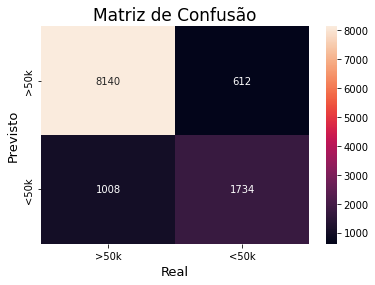

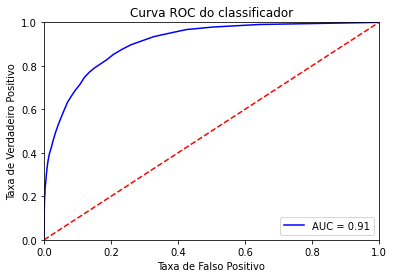

Threshold ideal: 0.26 para curva ROC



<span style='color:None'>**Acurácia** antes e depois do *thresholding*: 0.86, 0.81</span>

<span style='color:None'>**Precisão** antes e depois do  *thresholding*: 0.74, 0.56</span>

<span style='color:None'>**Recall** Score antes e depois do *thresholding*: 0.63, 0.85</span>

<span style='color:None'>**F1 Score** antes e depois do *thresholding*: 0.68, 0.68</span>

<span style='color:None'>**ROC Score** antes e depois do *thresholding*: 0.78, 0.82</span>

In [65]:
show_ROC_and_default_metrics(best_model,X_test,y_test)

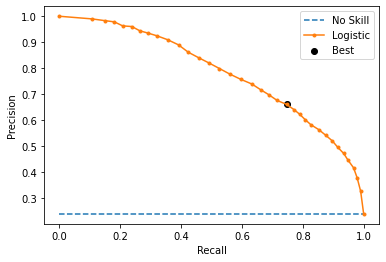

<span style='color:None'>Threshold ideal: 0.41 para curva Precision x Recall,F-Score=0.70</span>

<span style='color:None'>**Acurácia** antes e depois do *thresholding*: 0.86, 0.85</span>

<span style='color:None'>**Precisão** antes e depois do  *thresholding*: 0.74, 0.66</span>

<span style='color:None'>**Recall** Score antes e depois do *thresholding*: 0.63, 0.75</span>

<span style='color:None'>**F1 Score** antes e depois do *thresholding*: 0.68, 0.70</span>

<span style='color:None'>**ROC Score** antes e depois do *thresholding*: 0.78, 0.81</span>

In [66]:
show_precision_recall_curve_and_default_metrics(best_model,"KNN",X_test,y_test)

In [67]:
#data = [[24, 'Private','School', 'Never-married', 'Machine-op-inspct', 'Own-child', 'Black', 'Male', 40, 'S'],
# [38, 'Private', 'HS-grad', 'Married-civ-spouse', 'Farming-fishing', 'Husband', 'White', 'Male', 50, 'S'],
# [48, 'Local-gov', 'Masters', 'Divorced', 'Other-service', 'Not-in-family', 'White', 'Male', 40, 'S']]

#df= pd.DataFrame(data)[['param_max_features','param_n_estimators','mean_test_score']]
#df

#25	Private	School	Never-married	Machine-op-inspct	Own-child	Black	Male	40	0	S
#38	Private	HS-grad	Married-civ-spouse	Farming-fishing	Husband	White	Male	50	0	S
#48	Local-gov	Masters	Divorced	Other-service	Not-in-family	White	Male	40	0	S

#for row in data:
# print(row)   
 # make prediction
 #yhat = gridsearch.predict([row])
 # get the label
 #label = yhat[0]
 # summarize
 #print('>Predicted=%d (expected 0)' % (label))

##### Desempenho melhor configuração

- dentre as combinações possíveis para tratamento de nulos e da conversão dos atributos categóricos em numéricos a configuração que apresentou melhor desempenho para o KNN foi preenchimento dos nulos com a moda e one-hot-enconding com acurácia de 84.16% para base de treino e 83.4 para de testes. As demais configurações foram:

| Categorigal2Numeric | Nulls | Acurácia(Trn) | ROC(Trn) | Acurácia(Tst) | ROC(Tst) | # Registros | # Treino | # Teste
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| One-hot-enconding | DROP | 83.6% | 87.4% | 83.0% | 85.4% | 32749 | 21943 | 10806|
| One-hot-enconding | Mode | 83.7% | 86.9% | 83.4% | 85.9% | 35188 | 23571 | 11617 |
| Label-encoded | DROP | 84.8% | 82.3% | 80.9% | 82.0% | 32749 | 21943 | 10806 |
| Label-encoded | Mode | 85.0% | 82.5% | 82.7% | 81.7% | 35188 | 23571 | 11617 |

- Todas as configurações utilizaram normalização dos dados
- O tempo de processamento com label-encoded foi menor que as configurações com one-hot-encoding

#### Logistic Regression

ref.
 - https://scikit-learn.org/stable/modules/linear_model.html
 - https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions/52388406#52388406

##### Tuning dos hiperparâmetros

In [68]:
model = LogisticRegression()

In [69]:
param_grid_pipeline = {'logisticregression__class_weight': ['balanced'], 
                       'logisticregression__solver':['lbfgs','saga'],
                      'logisticregression__max_iter':[10000]}
best_model = tunning_models(model,param_grid_pipeline)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START logisticregression__class_weight=balanced, logisticregression__max_iter=10000, logisticregression__solver=lbfgs
[CV 1/5; 1/2] END logisticregression__class_weight=balanced, logisticregression__max_iter=10000, logisticregression__solver=lbfgs;, score=0.825 total time=   0.3s
[CV 2/5; 1/2] START logisticregression__class_weight=balanced, logisticregression__max_iter=10000, logisticregression__solver=lbfgs
[CV 2/5; 1/2] END logisticregression__class_weight=balanced, logisticregression__max_iter=10000, logisticregression__solver=lbfgs;, score=0.811 total time=   0.2s
[CV 3/5; 1/2] START logisticregression__class_weight=balanced, logisticregression__max_iter=10000, logisticregression__solver=lbfgs
[CV 3/5; 1/2] END logisticregression__class_weight=balanced, logisticregression__max_iter=10000, logisticregression__solver=lbfgs;, score=0.820 total time=   0.2s
[CV 4/5; 1/2] START logisticregression__class_weight=ba

In [70]:
best_model.best_params_

{'logisticregression__class_weight': 'balanced',
 'logisticregression__max_iter': 10000,
 'logisticregression__solver': 'lbfgs'}

##### Validando com dados de teste

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      8752
           1       0.58      0.84      0.68      2742

    accuracy                           0.81     11494
   macro avg       0.76      0.82      0.78     11494
weighted avg       0.85      0.81      0.82     11494




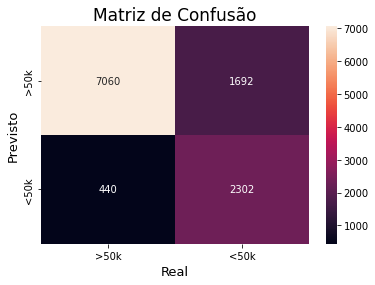

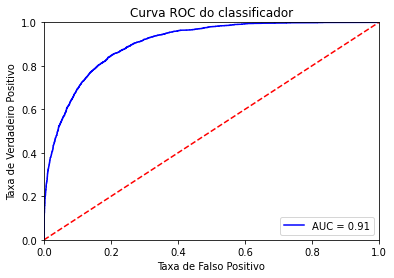

Threshold ideal: 0.50 para curva ROC



<span style='color:None'>**Acurácia** antes e depois do *thresholding*: 0.81, 0.82</span>

<span style='color:None'>**Precisão** antes e depois do  *thresholding*: 0.58, 0.58</span>

<span style='color:None'>**Recall** Score antes e depois do *thresholding*: 0.84, 0.84</span>

<span style='color:None'>**F1 Score** antes e depois do *thresholding*: 0.68, 0.69</span>

<span style='color:None'>**ROC Score** antes e depois do *thresholding*: 0.82, 0.82</span>

In [71]:
show_ROC_and_default_metrics(best_model,X_test,y_test)

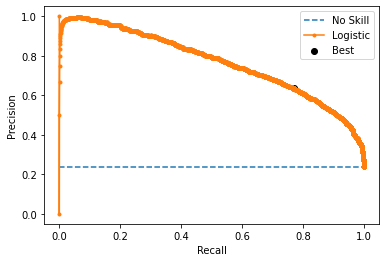

<span style='color:None'>Threshold ideal: 0.61 para curva Precision x Recall,F-Score=0.70</span>

<span style='color:None'>**Acurácia** antes e depois do *thresholding*: 0.81, 0.84</span>

<span style='color:None'>**Precisão** antes e depois do  *thresholding*: 0.58, 0.64</span>

<span style='color:None'>**Recall** Score antes e depois do *thresholding*: 0.84, 0.77</span>

<span style='color:None'>**F1 Score** antes e depois do *thresholding*: 0.68, 0.70</span>

<span style='color:None'>**ROC Score** antes e depois do *thresholding*: 0.82, 0.82</span>

In [72]:
show_precision_recall_curve_and_default_metrics(best_model,"LogisticRegression",X_test,y_test)

##### Outra abordagem

In [73]:
X_train_, y_train_ = features_with_one_hot_encoded_categories(train_data, num_col,cat_col)
X_test_, y_test_ = features_with_one_hot_encoded_categories(test_data, num_col,cat_col)
X_train_.shape

(23312, 56)

Fold #1
ROC AUC score : 0.912
Kappa score   : 0.581
F1 score      : 0.676
Accuracy      : 0.853
Precision      : 0.735
Recall      : 0.625
------------------------------
Fold #2
ROC AUC score : 0.906
Kappa score   : 0.575
F1 score      : 0.673
Accuracy      : 0.848
Precision      : 0.743
Recall      : 0.615
------------------------------
Fold #3
ROC AUC score : 0.912
Kappa score   : 0.599
F1 score      : 0.688
Accuracy      : 0.861
Precision      : 0.746
Recall      : 0.639
------------------------------
Fold #4
ROC AUC score : 0.912
Kappa score   : 0.590
F1 score      : 0.679
Accuracy      : 0.859
Precision      : 0.748
Recall      : 0.623
------------------------------

ROC AUC médio entre os folds  : 0.911
Kappa médio entre os folds    : 0.586
F1 médio entre os folds       : 0.679
Acurácia média entre os folds : 0.855
Precision média entre os folds : 0.743
Recall média entre os folds : 0.625


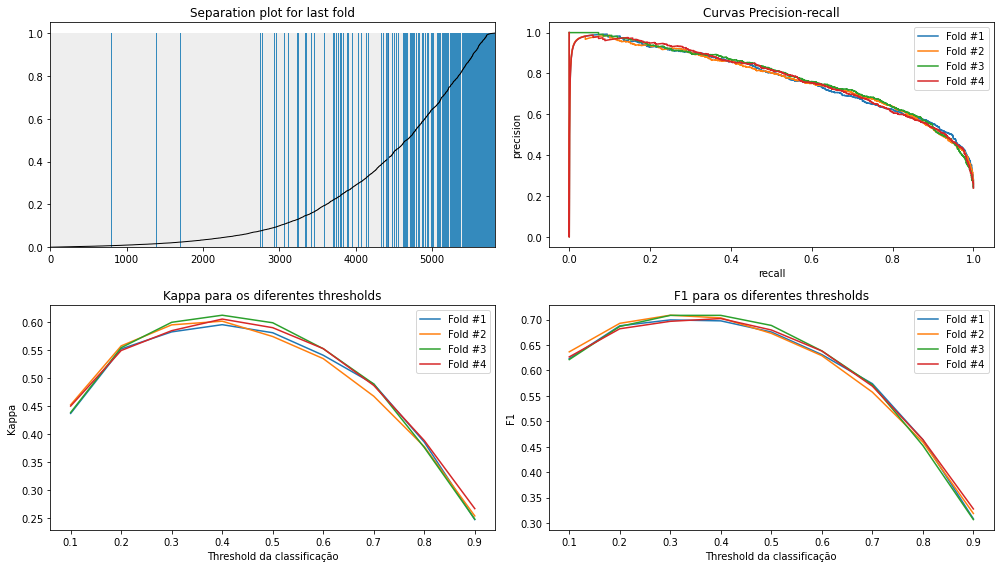

In [74]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()),
    ('classifier', LogisticRegression()),
])
validate_model(pipeline, X_train_, y_train_)

Fold #1
ROC AUC score : 0.907
Kappa score   : 0.565
F1 score      : 0.657
Accuracy      : 0.854
Precision      : 0.712
Recall      : 0.611
------------------------------
Fold #2
ROC AUC score : 0.910
Kappa score   : 0.611
F1 score      : 0.696
Accuracy      : 0.866
Precision      : 0.764
Recall      : 0.640
------------------------------
Fold #3
ROC AUC score : 0.898
Kappa score   : 0.542
F1 score      : 0.639
Accuracy      : 0.844
Precision      : 0.723
Recall      : 0.573
------------------------------
Fold #4
ROC AUC score : 0.910
Kappa score   : 0.583
F1 score      : 0.674
Accuracy      : 0.856
Precision      : 0.755
Recall      : 0.608
------------------------------

ROC AUC médio entre os folds  : 0.906
Kappa médio entre os folds    : 0.575
F1 médio entre os folds       : 0.667
Acurácia média entre os folds : 0.855
Precision média entre os folds : 0.739
Recall média entre os folds : 0.608


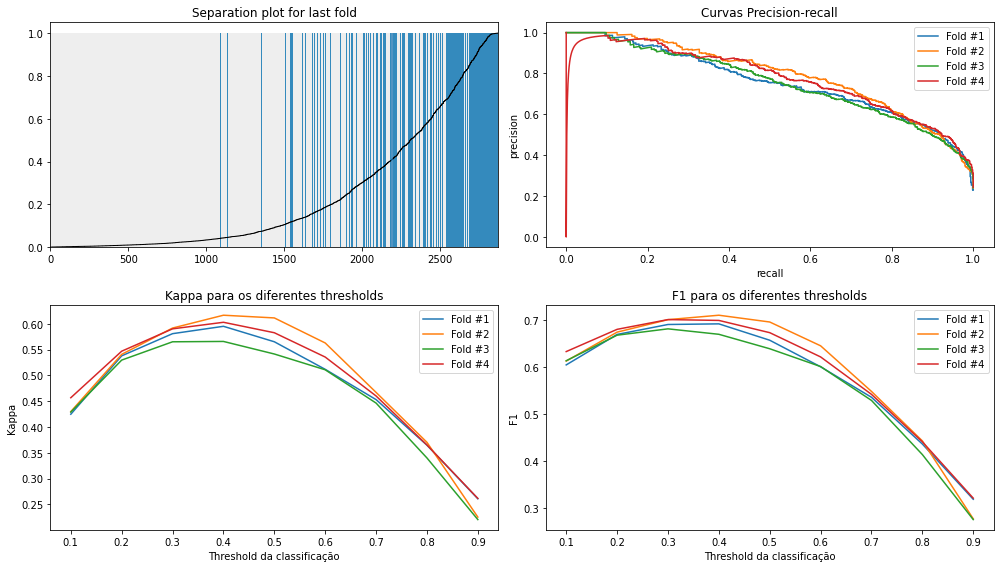

In [75]:
validate_model(pipeline, X_test_, y_test_)

####  Boosted Trees (LightGBM)

refs.
 - https://neptune.ai/blog/xgboost-vs-lightgbm
 - https://towardsdatascience.com/lightgbm-vs-xgboost-which-algorithm-win-the-race-1ff7dd4917d
 - https://www.kaggle.com/code/somang1418/tuning-hyperparameters-under-10-minutes-lgbm

##### Tuning dos hiperparâmetros

In [76]:
model = lgb.LGBMClassifier()

In [77]:
param_grid_pipeline = {'lgbmclassifier__objective':['binary'],
                      'lgbmclassifier__max_depth': np.arange(3,10), }
best_model = tunning_models(model,param_grid_pipeline)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5; 1/7] START lgbmclassifier__max_depth=3, lgbmclassifier__objective=binary
[CV 1/5; 1/7] END lgbmclassifier__max_depth=3, lgbmclassifier__objective=binary;, score=0.873 total time=   0.0s
[CV 2/5; 1/7] START lgbmclassifier__max_depth=3, lgbmclassifier__objective=binary
[CV 2/5; 1/7] END lgbmclassifier__max_depth=3, lgbmclassifier__objective=binary;, score=0.869 total time=   0.0s
[CV 3/5; 1/7] START lgbmclassifier__max_depth=3, lgbmclassifier__objective=binary
[CV 3/5; 1/7] END lgbmclassifier__max_depth=3, lgbmclassifier__objective=binary;, score=0.870 total time=   0.0s
[CV 4/5; 1/7] START lgbmclassifier__max_depth=3, lgbmclassifier__objective=binary
[CV 4/5; 1/7] END lgbmclassifier__max_depth=3, lgbmclassifier__objective=binary;, score=0.874 total time=   0.1s
[CV 5/5; 1/7] START lgbmclassifier__max_depth=3, lgbmclassifier__objective=binary
[CV 5/5; 1/7] END lgbmclassifier__max_depth=3, lgbmclassifier__objective=binar

In [78]:
print(best_model.best_params_)

{'lgbmclassifier__max_depth': 8, 'lgbmclassifier__objective': 'binary'}



##### Validando com dados de teste

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      8752
           1       0.79      0.69      0.73      2742

    accuracy                           0.88     11494
   macro avg       0.85      0.81      0.83     11494
weighted avg       0.88      0.88      0.88     11494




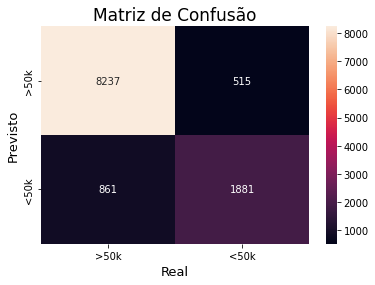

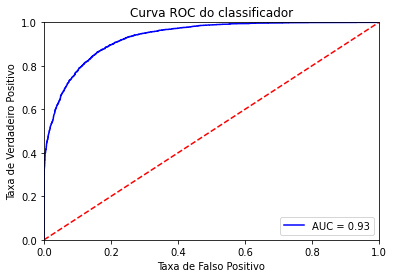

Threshold ideal: 0.25 para curva ROC



<span style='color:None'>**Acurácia** antes e depois do *thresholding*: 0.88, 0.85</span>

<span style='color:None'>**Precisão** antes e depois do  *thresholding*: 0.79, 0.63</span>

<span style='color:None'>**Recall** Score antes e depois do *thresholding*: 0.69, 0.86</span>

<span style='color:None'>**F1 Score** antes e depois do *thresholding*: 0.73, 0.73</span>

<span style='color:None'>**ROC Score** antes e depois do *thresholding*: 0.81, 0.85</span>

In [79]:
show_ROC_and_default_metrics(best_model,X_test,y_test)

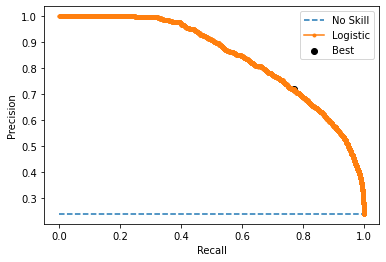

<span style='color:None'>Threshold ideal: 0.39 para curva Precision x Recall,F-Score=0.74</span>

<span style='color:None'>**Acurácia** antes e depois do *thresholding*: 0.88, 0.87</span>

<span style='color:None'>**Precisão** antes e depois do  *thresholding*: 0.79, 0.72</span>

<span style='color:None'>**Recall** Score antes e depois do *thresholding*: 0.69, 0.77</span>

<span style='color:None'>**F1 Score** antes e depois do *thresholding*: 0.73, 0.74</span>

<span style='color:None'>**ROC Score** antes e depois do *thresholding*: 0.81, 0.84</span>

In [80]:
show_precision_recall_curve_and_default_metrics(best_model,"LGBMClassifier",X_test,y_test)

####  Boosted Trees (XGBoost)

##### Tuning dos hiperparâmetros

In [81]:
model = XGBClassifier()

In [82]:
param_grid_pipeline = {'xgbclassifier__max_depth': [3,6],'xgbclassifier__learning_rate': [0.01,0.1,0.3],
    'xgbclassifier__n_estimators': [30,50,80],'xgbclassifier__colsample_bytree': [0.1, 0.5, 1]}
best_model = tunning_models(model,param_grid_pipeline)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START xgbclassifier__colsample_bytree=0.1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=30
[CV 1/5; 1/54] END xgbclassifier__colsample_bytree=0.1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=30;, score=0.755 total time=   0.1s
[CV 2/5; 1/54] START xgbclassifier__colsample_bytree=0.1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=30
[CV 2/5; 1/54] END xgbclassifier__colsample_bytree=0.1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=30;, score=0.755 total time=   0.1s
[CV 3/5; 1/54] START xgbclassifier__colsample_bytree=0.1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=30
[CV 3/5; 1/54] END xgbclassifier__colsample_bytree=0.1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=

[CV 5/5; 5/54] END xgbclassifier__colsample_bytree=0.1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=50;, score=0.755 total time=   0.1s
[CV 1/5; 6/54] START xgbclassifier__colsample_bytree=0.1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=80
[CV 1/5; 6/54] END xgbclassifier__colsample_bytree=0.1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=80;, score=0.758 total time=   0.2s
[CV 2/5; 6/54] START xgbclassifier__colsample_bytree=0.1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=80
[CV 2/5; 6/54] END xgbclassifier__colsample_bytree=0.1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=80;, score=0.756 total time=   0.3s
[CV 3/5; 6/54] START xgbclassifier__colsample_bytree=0.1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=6, xgbclassifier__n_estimator

[CV 1/5; 11/54] END xgbclassifier__colsample_bytree=0.1, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=50;, score=0.841 total time=   0.1s
[CV 2/5; 11/54] START xgbclassifier__colsample_bytree=0.1, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=50
[CV 2/5; 11/54] END xgbclassifier__colsample_bytree=0.1, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=50;, score=0.840 total time=   0.1s
[CV 3/5; 11/54] START xgbclassifier__colsample_bytree=0.1, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=50
[CV 3/5; 11/54] END xgbclassifier__colsample_bytree=0.1, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=50;, score=0.837 total time=   0.2s
[CV 4/5; 11/54] START xgbclassifier__colsample_bytree=0.1, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=6, xgbclassifier__n_estimator

[CV 2/5; 16/54] END xgbclassifier__colsample_bytree=0.1, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=30;, score=0.850 total time=   0.1s
[CV 3/5; 16/54] START xgbclassifier__colsample_bytree=0.1, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=30
[CV 3/5; 16/54] END xgbclassifier__colsample_bytree=0.1, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=30;, score=0.855 total time=   0.1s
[CV 4/5; 16/54] START xgbclassifier__colsample_bytree=0.1, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=30
[CV 4/5; 16/54] END xgbclassifier__colsample_bytree=0.1, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=30;, score=0.855 total time=   0.1s
[CV 5/5; 16/54] START xgbclassifier__colsample_bytree=0.1, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=6, xgbclassifier__n_estimator

[CV 2/5; 21/54] END xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=80;, score=0.834 total time=   0.2s
[CV 3/5; 21/54] START xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=80
[CV 3/5; 21/54] END xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=80;, score=0.847 total time=   0.2s
[CV 4/5; 21/54] START xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=80
[CV 4/5; 21/54] END xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=80;, score=0.835 total time=   0.2s
[CV 5/5; 21/54] START xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=3, xgbclassifier__n_est

[CV 2/5; 26/54] END xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=50;, score=0.858 total time=   0.1s
[CV 3/5; 26/54] START xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=50
[CV 3/5; 26/54] END xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=50;, score=0.861 total time=   0.1s
[CV 4/5; 26/54] START xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=50
[CV 4/5; 26/54] END xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=50;, score=0.868 total time=   0.1s
[CV 5/5; 26/54] START xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimator

[CV 2/5; 31/54] END xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=30;, score=0.863 total time=   0.1s
[CV 3/5; 31/54] START xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=30
[CV 3/5; 31/54] END xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=30;, score=0.870 total time=   0.1s
[CV 4/5; 31/54] START xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=30
[CV 4/5; 31/54] END xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=30;, score=0.876 total time=   0.1s
[CV 5/5; 31/54] START xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=3, xgbclassifier__n_estimator

[CV 2/5; 36/54] END xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=80;, score=0.881 total time=   0.3s
[CV 3/5; 36/54] START xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=80
[CV 3/5; 36/54] END xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=80;, score=0.881 total time=   0.3s
[CV 4/5; 36/54] START xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=80
[CV 4/5; 36/54] END xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=80;, score=0.887 total time=   0.3s
[CV 5/5; 36/54] START xgbclassifier__colsample_bytree=0.5, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=6, xgbclassifier__n_estimator

[CV 2/5; 41/54] END xgbclassifier__colsample_bytree=1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=50;, score=0.856 total time=   0.3s
[CV 3/5; 41/54] START xgbclassifier__colsample_bytree=1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=50
[CV 3/5; 41/54] END xgbclassifier__colsample_bytree=1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=50;, score=0.863 total time=   0.2s
[CV 4/5; 41/54] START xgbclassifier__colsample_bytree=1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=50
[CV 4/5; 41/54] END xgbclassifier__colsample_bytree=1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=50;, score=0.861 total time=   0.2s
[CV 5/5; 41/54] START xgbclassifier__colsample_bytree=1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=50
[

[CV 2/5; 46/54] END xgbclassifier__colsample_bytree=1, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=30;, score=0.863 total time=   0.2s
[CV 3/5; 46/54] START xgbclassifier__colsample_bytree=1, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=30
[CV 3/5; 46/54] END xgbclassifier__colsample_bytree=1, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=30;, score=0.869 total time=   0.2s
[CV 4/5; 46/54] START xgbclassifier__colsample_bytree=1, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=30
[CV 4/5; 46/54] END xgbclassifier__colsample_bytree=1, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=30;, score=0.875 total time=   0.1s
[CV 5/5; 46/54] START xgbclassifier__colsample_bytree=1, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=6, xgbclassifier__n_estimators=30
[CV 5/5

[CV 2/5; 51/54] END xgbclassifier__colsample_bytree=1, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=80;, score=0.877 total time=   0.2s
[CV 3/5; 51/54] START xgbclassifier__colsample_bytree=1, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=80
[CV 3/5; 51/54] END xgbclassifier__colsample_bytree=1, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=80;, score=0.880 total time=   0.2s
[CV 4/5; 51/54] START xgbclassifier__colsample_bytree=1, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=80
[CV 4/5; 51/54] END xgbclassifier__colsample_bytree=1, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=80;, score=0.885 total time=   0.2s
[CV 5/5; 51/54] START xgbclassifier__colsample_bytree=1, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=80
[CV 5/5

In [83]:
print(best_model.best_params_)

{'xgbclassifier__colsample_bytree': 1, 'xgbclassifier__learning_rate': 0.3, 'xgbclassifier__max_depth': 6, 'xgbclassifier__n_estimators': 80}


##### Validando com dados de teste

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      8752
           1       0.78      0.69      0.73      2742

    accuracy                           0.88     11494
   macro avg       0.84      0.82      0.83     11494
weighted avg       0.88      0.88      0.88     11494




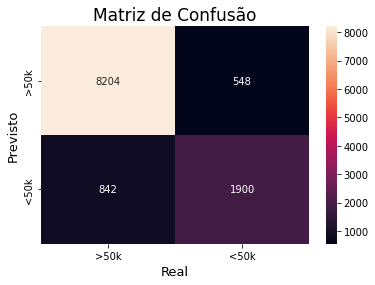

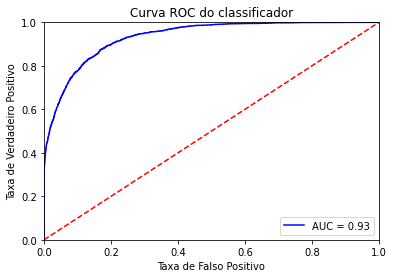

Threshold ideal: 0.22 para curva ROC



<span style='color:None'>**Acurácia** antes e depois do *thresholding*: 0.88, 0.84</span>

<span style='color:None'>**Precisão** antes e depois do  *thresholding*: 0.78, 0.62</span>

<span style='color:None'>**Recall** Score antes e depois do *thresholding*: 0.69, 0.87</span>

<span style='color:None'>**F1 Score** antes e depois do *thresholding*: 0.73, 0.73</span>

<span style='color:None'>**ROC Score** antes e depois do *thresholding*: 0.82, 0.85</span>

In [84]:
show_ROC_and_default_metrics(best_model,X_test,y_test)

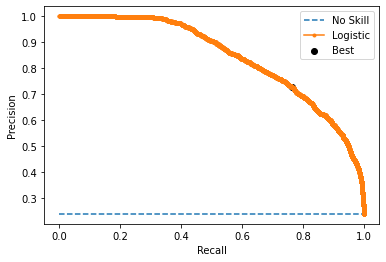

<span style='color:None'>Threshold ideal: 0.40 para curva Precision x Recall,F-Score=0.75</span>

<span style='color:None'>**Acurácia** antes e depois do *thresholding*: 0.88, 0.88</span>

<span style='color:None'>**Precisão** antes e depois do  *thresholding*: 0.78, 0.73</span>

<span style='color:None'>**Recall** Score antes e depois do *thresholding*: 0.69, 0.76</span>

<span style='color:None'>**F1 Score** antes e depois do *thresholding*: 0.73, 0.75</span>

<span style='color:None'>**ROC Score** antes e depois do *thresholding*: 0.82, 0.84</span>

In [85]:
show_precision_recall_curve_and_default_metrics(best_model,"XGBClassifier",X_test,y_test)

####  Random Forest

 - https://www.upgrad.com/blog/random-forest-hyperparameter-tuning/

##### Sem tuning

In [86]:
y_train_ = train_data[target_column].values
X_train_ = train_data.drop(target_column, axis=1)

In [87]:
#cat_col
#num_col
X_train_=pd.get_dummies(data=X_train_,columns=cat_col,drop_first=True)
X_train_.head(5)

age  capital-gain  capital-loss  hours-per-week  workclass_Local-gov  \
0   39        2174.0             0              40                    0   
1   50           0.0             0              13                    0   
3   53           0.0             0              40                    0   
4   28           0.0             0              40                    0   
5   37           0.0             0              40                    0   

   workclass_Private  workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
0                  0                       0                           0   
1                  0                       0                           1   
3                  1                       0                           0   
4                  1                       0                           0   
5                  1                       0                           0   

   workclass_State-gov  workclass_Without-pay  ...  \
0                    1                      0  ...   
1                    0                      0  ...   
3                    0                      0  ...   
4                    0                      0  ...   
5                    0                      0  ...   

   relationship_Other-relative  relationship_Own-child  \
0                            0                       0   
1                            0                       0   
3                            0                       0   
4                            0                       0   
5                            0                       0   

   relationship_Unmarried  relationship_Wife  race_Asian-Pac-Islander  \
0                       0                  0                        0   
1                       0                  0                        0   
3                       0                  0                        0   
4                       0                  1                        0   
5                       0                  1                        0   

   race_Black  race_Other  race_White  sex_Male  fromUS_S  
0           0           0           1         1         1  
1           0           0           1         1         1  
3           1           0           0         1         1  
4           1           0           0         0         0  
5           0           0           1         0         1  

[5 rows x 48 columns]

In [88]:
y_test_ = test_data[target_column].values
X_test_ = test_data.drop(target_column, axis=1)
X_test_ = pd.get_dummies(data=X_test_,columns=cat_col,drop_first=True)
X_test_.head(5)

age  capital-gain  capital-loss  hours-per-week  workclass_Local-gov  \
0   25           0.0             0              40                    0   
1   38           0.0             0              50                    0   
2   28           0.0             0              40                    1   
3   44        7688.0             0              40                    0   
7   63        3103.0             0              32                    0   

   workclass_Private  workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
0                  1                       0                           0   
1                  1                       0                           0   
2                  0                       0                           0   
3                  1                       0                           0   
7                  0                       0                           1   

   workclass_State-gov  workclass_Without-pay  ...  \
0                    0                      0  ...   
1                    0                      0  ...   
2                    0                      0  ...   
3                    0                      0  ...   
7                    0                      0  ...   

   relationship_Other-relative  relationship_Own-child  \
0                            0                       1   
1                            0                       0   
2                            0                       0   
3                            0                       0   
7                            0                       0   

   relationship_Unmarried  relationship_Wife  race_Asian-Pac-Islander  \
0                       0                  0                        0   
1                       0                  0                        0   
2                       0                  0                        0   
3                       0                  0                        0   
7                       0                  0                        0   

   race_Black  race_Other  race_White  sex_Male  fromUS_S  
0           1           0           0         1         1  
1           0           0           1         1         1  
2           0           0           1         1         1  
3           1           0           0         1         1  
7           0           0           1         1         1  

[5 rows x 48 columns]

In [89]:
model = RandomForestClassifier()

In [90]:
model.fit(X_train_,y_train_)

RandomForestClassifier()

In [91]:
y_pred = model.predict(X_train_)

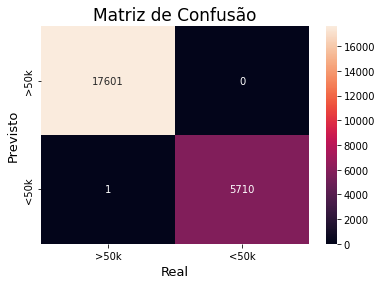

In [92]:
plot_confusion_matrix_and_evaluation_metrics(y_train_,y_pred)

In [93]:
print(classification_report(y_train_, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17601
           1       1.00      1.00      1.00      5711

    accuracy                           1.00     23312
   macro avg       1.00      1.00      1.00     23312
weighted avg       1.00      1.00      1.00     23312



In [94]:
y_pred = model.predict(X_test_)

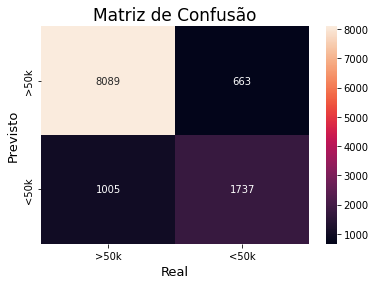

In [95]:
plot_confusion_matrix_and_evaluation_metrics(y_test_,y_pred)

In [96]:
print(classification_report(y_test_, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      8752
           1       0.72      0.63      0.68      2742

    accuracy                           0.85     11494
   macro avg       0.81      0.78      0.79     11494
weighted avg       0.85      0.85      0.85     11494



##### Relevância dos preditores

In [97]:
#import shap
#shap.initjs()

In [98]:
#explainer = shap.TreeExplainer(model)
#shap_values = explainer.shap_values(X_test_)
#shap.summary_plot(shap_values, X_test_, predictor_columns)
#shap.summary_plot(shap_values, X_test_, predictor_columns, plot_type='bar')

##### Tuning dos hiperparâmetros

In [99]:
param_grid_pipeline = {'randomforestclassifier__bootstrap': [True],
                       'randomforestclassifier__max_depth': [40, 80],
                       'randomforestclassifier__max_features': [2, 3],
                       'randomforestclassifier__min_samples_leaf': [3, 5],
                       'randomforestclassifier__min_samples_split': [5,8],
                       'randomforestclassifier__n_estimators': [50]
}

best_model = tunning_models(model,param_grid_pipeline)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=40, randomforestclassifier__max_features=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=50
[CV 1/5; 1/16] END randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=40, randomforestclassifier__max_features=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=50;, score=0.864 total time=   1.4s
[CV 2/5; 1/16] START randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=40, randomforestclassifier__max_features=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=50
[CV 2/5; 1/16] END randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=40, randomf

[CV 5/5; 3/16] END randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=40, randomforestclassifier__max_features=2, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=50;, score=0.852 total time=   1.0s
[CV 1/5; 4/16] START randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=40, randomforestclassifier__max_features=2, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=50
[CV 1/5; 4/16] END randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=40, randomforestclassifier__max_features=2, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=50;, score=0.858 total time=   1.0s
[CV 2/5; 4/16] START randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=40, randomforestclassifier__max_feature

[CV 5/5; 6/16] END randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=40, randomforestclassifier__max_features=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=50;, score=0.866 total time=   1.7s
[CV 1/5; 7/16] START randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=40, randomforestclassifier__max_features=3, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=50
[CV 1/5; 7/16] END randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=40, randomforestclassifier__max_features=3, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=50;, score=0.866 total time=   1.3s
[CV 2/5; 7/16] START randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=40, randomforestclassifier__max_feature

[CV 5/5; 9/16] END randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=80, randomforestclassifier__max_features=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=50;, score=0.862 total time=   1.4s
[CV 1/5; 10/16] START randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=80, randomforestclassifier__max_features=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=50
[CV 1/5; 10/16] END randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=80, randomforestclassifier__max_features=2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=50;, score=0.863 total time=   1.4s
[CV 2/5; 10/16] START randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=80, randomforestclassifier__max_feat

[CV 5/5; 12/16] END randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=80, randomforestclassifier__max_features=2, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=50;, score=0.860 total time=   1.0s
[CV 1/5; 13/16] START randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=80, randomforestclassifier__max_features=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=50
[CV 1/5; 13/16] END randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=80, randomforestclassifier__max_features=3, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=50;, score=0.869 total time=   1.7s
[CV 2/5; 13/16] START randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=80, randomforestclassifier__max_fea

[CV 5/5; 15/16] END randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=80, randomforestclassifier__max_features=3, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=50;, score=0.866 total time=   1.3s
[CV 1/5; 16/16] START randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=80, randomforestclassifier__max_features=3, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=50
[CV 1/5; 16/16] END randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=80, randomforestclassifier__max_features=3, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=50;, score=0.866 total time=   1.3s
[CV 2/5; 16/16] START randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=80, randomforestclassifier__max_fea

In [100]:
print(best_model.best_estimator_)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('c', OneHotEncoder(),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex', 'fromUS']),
                                                 ('n', StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=80, max_features=3,
                                        min_samples_leaf=3, min_samples_split=5,
                                        n_estimators=50))])


In [101]:
print(best_model.best_params_)

{'randomforestclassifier__bootstrap': True, 'randomforestclassifier__max_depth': 80, 'randomforestclassifier__max_features': 3, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 50}


##### **Validando com dados de teste**

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8752
           1       0.78      0.60      0.68      2742

    accuracy                           0.86     11494
   macro avg       0.83      0.77      0.80     11494
weighted avg       0.86      0.86      0.86     11494




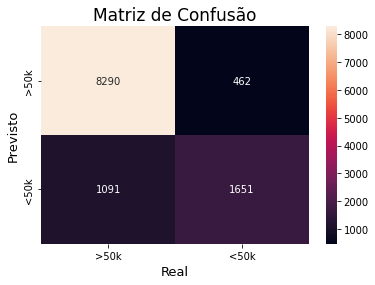

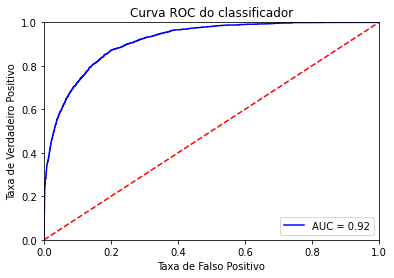

Threshold ideal: 0.26 para curva ROC



<span style='color:None'>**Acurácia** antes e depois do *thresholding*: 0.86, 0.82</span>

<span style='color:None'>**Precisão** antes e depois do  *thresholding*: 0.78, 0.58</span>

<span style='color:None'>**Recall** Score antes e depois do *thresholding*: 0.60, 0.87</span>

<span style='color:None'>**F1 Score** antes e depois do *thresholding*: 0.68, 0.69</span>

<span style='color:None'>**ROC Score** antes e depois do *thresholding*: 0.77, 0.84</span>

In [102]:
show_ROC_and_default_metrics(best_model,X_test,y_test)

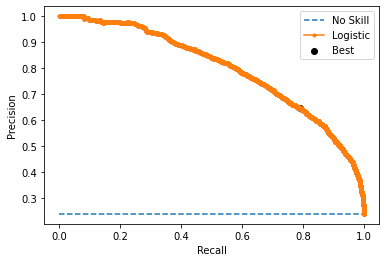

<span style='color:None'>Threshold ideal: 0.34 para curva Precision x Recall,F-Score=0.71</span>

<span style='color:None'>**Acurácia** antes e depois do *thresholding*: 0.86, 0.85</span>

<span style='color:None'>**Precisão** antes e depois do  *thresholding*: 0.78, 0.65</span>

<span style='color:None'>**Recall** Score antes e depois do *thresholding*: 0.60, 0.79</span>

<span style='color:None'>**F1 Score** antes e depois do *thresholding*: 0.68, 0.71</span>

<span style='color:None'>**ROC Score** antes e depois do *thresholding*: 0.77, 0.83</span>

In [103]:
show_precision_recall_curve_and_default_metrics(best_model,"RandomForest",X_test,y_test)

#### SVM

- considerar não usar normalização dos dados
- testar one-hot ou labeled

ref:
   - https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/
   - https://estatsite.com.br/2020/09/15/exemplos-pipelines-usando-scikit-learn/ (sobre Pipelines)
   - https://medium.com/analytics-vidhya/smote-nc-in-ml-categorization-models-fo-imbalanced-datasets-8adbdcf08c25 (sobre SMOTENC)
   - https://imbalanced-learn.org/dev/over_sampling.html#smote-variants 

##### Sem tuning

In [104]:
y_train_ = train_data[target_column].values
X_train_ = train_data.drop(target_column, axis=1)

In [105]:
#cat_col
#num_col
X_train_=pd.get_dummies(data=X_train_,columns=cat_col,drop_first=True)
X_train_["age"] = MinMax(X_train_[["age"]])
X_train_["hours-per-week"] = MinMax(X_train_[["hours-per-week"]])
X_train_["capital-gain"] = MinMax(X_train_[["capital-gain"]])
X_train_["capital-loss"] = MinMax(X_train_[["capital-loss"]])
X_train_.head(5)

age  capital-gain  capital-loss  hours-per-week  workclass_Local-gov  \
0  0.301370      0.052626           0.0        0.397959                    0   
1  0.452055      0.000000           0.0        0.122449                    0   
3  0.493151      0.000000           0.0        0.397959                    0   
4  0.150685      0.000000           0.0        0.397959                    0   
5  0.273973      0.000000           0.0        0.397959                    0   

   workclass_Private  workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
0                  0                       0                           0   
1                  0                       0                           1   
3                  1                       0                           0   
4                  1                       0                           0   
5                  1                       0                           0   

   workclass_State-gov  workclass_Without-pay  ...  \
0                    1                      0  ...   
1                    0                      0  ...   
3                    0                      0  ...   
4                    0                      0  ...   
5                    0                      0  ...   

   relationship_Other-relative  relationship_Own-child  \
0                            0                       0   
1                            0                       0   
3                            0                       0   
4                            0                       0   
5                            0                       0   

   relationship_Unmarried  relationship_Wife  race_Asian-Pac-Islander  \
0                       0                  0                        0   
1                       0                  0                        0   
3                       0                  0                        0   
4                       0                  1                        0   
5                       0                  1                        0   

   race_Black  race_Other  race_White  sex_Male  fromUS_S  
0           0           0           1         1         1  
1           0           0           1         1         1  
3           1           0           0         1         1  
4           1           0           0         0         0  
5           0           0           1         0         1  

[5 rows x 48 columns]

In [106]:
y_test_ = test_data[target_column].values
X_test_ = test_data.drop(target_column, axis=1)
X_test_ = pd.get_dummies(data=X_test_,columns=cat_col,drop_first=True)
X_test_["age"] = MinMax(X_test_[["age"]])
X_test_["hours-per-week"] = MinMax(X_test_[["hours-per-week"]])
X_test_["capital-gain"] = MinMax(X_test_[["capital-gain"]])
X_test_["capital-loss"] = MinMax(X_test_[["capital-loss"]])
X_test_.head(5)

age  capital-gain  capital-loss  hours-per-week  workclass_Local-gov  \
0  0.109589      0.000000           0.0        0.397959                    0   
1  0.287671      0.000000           0.0        0.500000                    0   
2  0.150685      0.000000           0.0        0.397959                    1   
3  0.369863      0.186105           0.0        0.397959                    0   
7  0.630137      0.075115           0.0        0.316327                    0   

   workclass_Private  workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
0                  1                       0                           0   
1                  1                       0                           0   
2                  0                       0                           0   
3                  1                       0                           0   
7                  0                       0                           1   

   workclass_State-gov  workclass_Without-pay  ...  \
0                    0                      0  ...   
1                    0                      0  ...   
2                    0                      0  ...   
3                    0                      0  ...   
7                    0                      0  ...   

   relationship_Other-relative  relationship_Own-child  \
0                            0                       1   
1                            0                       0   
2                            0                       0   
3                            0                       0   
7                            0                       0   

   relationship_Unmarried  relationship_Wife  race_Asian-Pac-Islander  \
0                       0                  0                        0   
1                       0                  0                        0   
2                       0                  0                        0   
3                       0                  0                        0   
7                       0                  0                        0   

   race_Black  race_Other  race_White  sex_Male  fromUS_S  
0           1           0           0         1         1  
1           0           0           1         1         1  
2           0           0           1         1         1  
3           1           0           0         1         1  
7           0           0           1         1         1  

[5 rows x 48 columns]

In [107]:
y_train_[y_train_ == 0] = -1
y_test_[y_test_ == 0] = -1

In [108]:
#model = SVC(probability=True) # documentação recomenda não usar esse opção para SVM
model = SVC()

In [109]:
model.fit(X_train_,y_train_)

SVC()

In [110]:
y_pred = model.predict(X_train_)

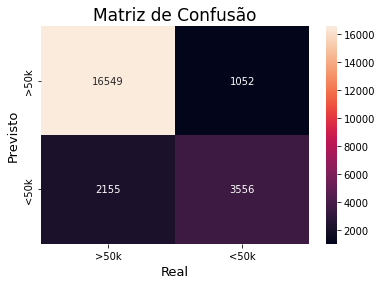

In [111]:
plot_confusion_matrix_and_evaluation_metrics(y_train_,y_pred)

In [112]:
print(classification_report(y_train_, y_pred))

              precision    recall  f1-score   support

          -1       0.88      0.94      0.91     17601
           1       0.77      0.62      0.69      5711

    accuracy                           0.86     23312
   macro avg       0.83      0.78      0.80     23312
weighted avg       0.86      0.86      0.86     23312



In [113]:
y_pred = model.predict(X_test_)

In [114]:
print(classification_report(y_test_, y_pred))

              precision    recall  f1-score   support

          -1       0.88      0.93      0.91      8752
           1       0.74      0.60      0.66      2742

    accuracy                           0.85     11494
   macro avg       0.81      0.77      0.78     11494
weighted avg       0.85      0.85      0.85     11494



##### Tuning dos hiperparâmetros

In [115]:
#cat_col_index = [1, 2, 3, 4, 5, 6, 7, 9]
#sm = SMOTENC(categorical_features=cat_col_index, random_state=123, sampling_strategy=.99)
#X_trainres, y_trainres = sm.fit_resample(X_train, y_train)

In [116]:
#param_grid_pipeline = {'svc__C': 10. ** np.arange(-3, 3), 'svc__gamma': 10. ** np.arange(-3, 3)}
param_grid_pipeline = {'svc__C': [100], 'svc__gamma': [1, 0.1, 0.01], 'svc__kernel': ['rbf']}
best_model = tunning_models(model,param_grid_pipeline)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START svc__C=100, svc__gamma=1, svc__kernel=rbf...................
[CV 1/5; 1/3] END svc__C=100, svc__gamma=1, svc__kernel=rbf;, score=0.808 total time=  55.8s
[CV 2/5; 1/3] START svc__C=100, svc__gamma=1, svc__kernel=rbf...................
[CV 2/5; 1/3] END svc__C=100, svc__gamma=1, svc__kernel=rbf;, score=0.807 total time=  56.9s
[CV 3/5; 1/3] START svc__C=100, svc__gamma=1, svc__kernel=rbf...................
[CV 3/5; 1/3] END svc__C=100, svc__gamma=1, svc__kernel=rbf;, score=0.806 total time=  55.7s
[CV 4/5; 1/3] START svc__C=100, svc__gamma=1, svc__kernel=rbf...................
[CV 4/5; 1/3] END svc__C=100, svc__gamma=1, svc__kernel=rbf;, score=0.814 total time=  56.1s
[CV 5/5; 1/3] START svc__C=100, svc__gamma=1, svc__kernel=rbf...................
[CV 5/5; 1/3] END svc__C=100, svc__gamma=1, svc__kernel=rbf;, score=0.804 total time=  54.5s
[CV 1/5; 2/3] START svc__C=100, svc__gamma=0.1, svc__kernel=rbf.......

##### **Validando com dados de teste**

<span style='color:red'>Threshold **não se aplica** para SVC</span>

              precision    recall  f1-score   support

          -1       0.89      0.94      0.91      8752
           1       0.76      0.62      0.68      2742

    accuracy                           0.86     11494
   macro avg       0.82      0.78      0.80     11494
weighted avg       0.86      0.86      0.86     11494




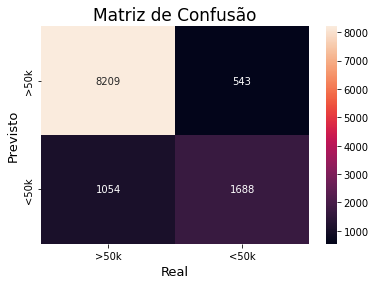

<span style='color:None'>**Acurácia** antes e depois do *thresholding*: 0.86, 0.86</span>

<span style='color:None'>**Precisão** antes e depois do  *thresholding*: 0.76, 0.76</span>

<span style='color:None'>**Recall** Score antes e depois do *thresholding*: 0.62, 0.62</span>

<span style='color:None'>**F1 Score** antes e depois do *thresholding*: 0.68, 0.68</span>

<span style='color:None'>**ROC Score** antes e depois do *thresholding*: 0.78, 0.78</span>

In [117]:
show_ROC_and_default_metrics(best_model,X_test,y_test)

In [118]:
show_precision_recall_curve_and_default_metrics(best_model,"SVM",X_test,y_test)

<span style='color:red'>Threshold **não se aplica** para SVC</span>

<span style='color:None'>**Acurácia** antes e depois do *thresholding*: 0.86, 0.86</span>

<span style='color:None'>**Precisão** antes e depois do  *thresholding*: 0.76, 0.76</span>

<span style='color:None'>**Recall** Score antes e depois do *thresholding*: 0.62, 0.62</span>

<span style='color:None'>**F1 Score** antes e depois do *thresholding*: 0.68, 0.68</span>

<span style='color:None'>**ROC Score** antes e depois do *thresholding*: 0.78, 0.78</span>

##### Teste com registros

In [119]:
data = [[24, 'Private','School', 'Never-married', 'Machine-op-inspct', 'Own-child', 'Black', 'Male', 40, 'S'],
 [38, 'Private', 'HS-grad', 'Married-civ-spouse', 'Farming-fishing', 'Husband', 'White', 'Male', 50, 'S'],
 [48, 'Local-gov', 'Masters', 'Divorced', 'Other-service', 'Not-in-family', 'White', 'Male', 40, 'S']]

#25	Private	School	Never-married	Machine-op-inspct	Own-child	Black	Male	40	0	S
#38	Private	HS-grad	Married-civ-spouse	Farming-fishing	Husband	White	Male	50	0	S
#48	Local-gov	Masters	Divorced	Other-service	Not-in-family	White	Male	40	0	S

for row in data:
 print(row)   
 # make prediction
 #yhat = grid.predict([row])
 # get the label
 #label = yhat[0]
 # summarize
 #print('>Predicted=%d (expected 0)' % (label))

[24, 'Private', 'School', 'Never-married', 'Machine-op-inspct', 'Own-child', 'Black', 'Male', 40, 'S']
[38, 'Private', 'HS-grad', 'Married-civ-spouse', 'Farming-fishing', 'Husband', 'White', 'Male', 50, 'S']
[48, 'Local-gov', 'Masters', 'Divorced', 'Other-service', 'Not-in-family', 'White', 'Male', 40, 'S']


In [120]:
# evaluate on some >50K cases (known class 1)
#print('>50K cases:')
#data = [[28, 'Local-gov','Assoc-acdm', 'Married-civ-spouse', 'Protective-serv', 'Husband', 'White', 'Male', 40, 'S'],
# [44, 'Private', 'Some-college', 'Married-civ-spouse', 'Machine-op-inspct', 'Husband', 'Black', 'Male', 40, 'S'],
# [63, 'Self-emp-not-inc', 'Prof-school', 'Married-civ-spouse', 'Prof-specialty', 'Husband', 'White', 'M', 32, 'S']]
#28	Local-gov	Assoc-acdm	Married-civ-spouse	Protective-serv	Husband	White	Male	40	1	S
#44	Private	Some-college	Married-civ-spouse	Machine-op-inspct	Husband	Black	Male	40	1	S
#63	Self-emp-not-inc	Prof-school	Married-civ-spouse	Prof-specialty	Husband	White	Male	32	1	S
#for row in data:
 # make prediction
# yhat = grid.predict([row])
 # get the label
# label = yhat[0]
 # summarize
# print('>Predicted=%d (expected 1)' % (label))

####  Neural Network

refs.
- https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-neural-network
- https://michael-fuchs-python.netlify.app/2021/02/03/nn-multi-layer-perceptron-classifier-mlpclassifier/

##### Tuning dos hiperparâmetros

In [121]:
y_train_[y_train_ == -1] = 0
y_test_[y_test_ == -1] = 0

In [122]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()

In [123]:
param_grid_pipeline =  {'mlpclassifier__solver': ['adam'], 'mlpclassifier__max_iter': [1500],
                        'mlpclassifier__learning_rate': ['constant','adaptive'],
                        'mlpclassifier__activation': ['relu'], 
                        'mlpclassifier__early_stopping': [False],
                        'mlpclassifier__hidden_layer_sizes':[(15,10),(15)]}

     # 'mlpclassifier__activation': ['tanh','relu'], 
     # 'mlpclassifier__early_stopping': [True,False],
     #'estimator__alpha': [0.0001, 0.001, 0.005],
    
best_model = tunning_models(model,param_grid_pipeline)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START mlpclassifier__activation=relu, mlpclassifier__early_stopping=False, mlpclassifier__hidden_layer_sizes=(15, 10), mlpclassifier__learning_rate=constant, mlpclassifier__max_iter=1500, mlpclassifier__solver=adam
[CV 1/5; 1/4] END mlpclassifier__activation=relu, mlpclassifier__early_stopping=False, mlpclassifier__hidden_layer_sizes=(15, 10), mlpclassifier__learning_rate=constant, mlpclassifier__max_iter=1500, mlpclassifier__solver=adam;, score=0.861 total time=  12.9s
[CV 2/5; 1/4] START mlpclassifier__activation=relu, mlpclassifier__early_stopping=False, mlpclassifier__hidden_layer_sizes=(15, 10), mlpclassifier__learning_rate=constant, mlpclassifier__max_iter=1500, mlpclassifier__solver=adam
[CV 2/5; 1/4] END mlpclassifier__activation=relu, mlpclassifier__early_stopping=False, mlpclassifier__hidden_layer_sizes=(15, 10), mlpclassifier__learning_rate=constant, mlpclassifier__max_iter=1500, mlpclassifier__solver=

[CV 3/5; 4/4] END mlpclassifier__activation=relu, mlpclassifier__early_stopping=False, mlpclassifier__hidden_layer_sizes=15, mlpclassifier__learning_rate=adaptive, mlpclassifier__max_iter=1500, mlpclassifier__solver=adam;, score=0.858 total time=  10.3s
[CV 4/5; 4/4] START mlpclassifier__activation=relu, mlpclassifier__early_stopping=False, mlpclassifier__hidden_layer_sizes=15, mlpclassifier__learning_rate=adaptive, mlpclassifier__max_iter=1500, mlpclassifier__solver=adam
[CV 4/5; 4/4] END mlpclassifier__activation=relu, mlpclassifier__early_stopping=False, mlpclassifier__hidden_layer_sizes=15, mlpclassifier__learning_rate=adaptive, mlpclassifier__max_iter=1500, mlpclassifier__solver=adam;, score=0.864 total time=   9.1s
[CV 5/5; 4/4] START mlpclassifier__activation=relu, mlpclassifier__early_stopping=False, mlpclassifier__hidden_layer_sizes=15, mlpclassifier__learning_rate=adaptive, mlpclassifier__max_iter=1500, mlpclassifier__solver=adam
[CV 5/5; 4/4] END mlpclassifier__activation=re

In [124]:
best_model.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('c', OneHotEncoder(),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex', 'fromUS']),
                                                 ('n', StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=15, max_iter=1500))])

##### Validando com dados de teste

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      8752
           1       0.73      0.63      0.68      2742

    accuracy                           0.86     11494
   macro avg       0.81      0.78      0.79     11494
weighted avg       0.85      0.86      0.85     11494




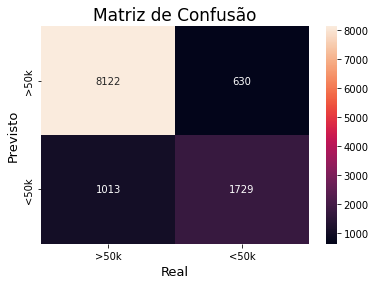

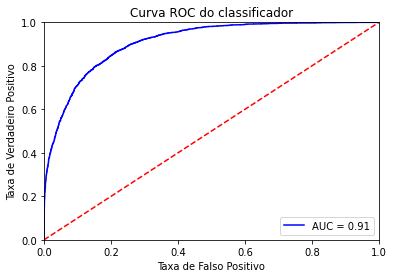

Threshold ideal: 0.20 para curva ROC



<span style='color:None'>**Acurácia** antes e depois do *thresholding*: 0.86, 0.80</span>

<span style='color:None'>**Precisão** antes e depois do  *thresholding*: 0.73, 0.56</span>

<span style='color:None'>**Recall** Score antes e depois do *thresholding*: 0.63, 0.86</span>

<span style='color:None'>**F1 Score** antes e depois do *thresholding*: 0.68, 0.68</span>

<span style='color:None'>**ROC Score** antes e depois do *thresholding*: 0.78, 0.82</span>

In [125]:
show_ROC_and_default_metrics(best_model,X_test,y_test)

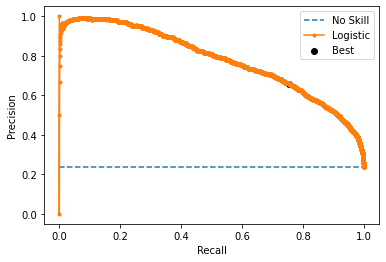

<span style='color:None'>Threshold ideal: 0.35 para curva Precision x Recall,F-Score=0.70</span>

<span style='color:None'>**Acurácia** antes e depois do *thresholding*: 0.86, 0.85</span>

<span style='color:None'>**Precisão** antes e depois do  *thresholding*: 0.73, 0.66</span>

<span style='color:None'>**Recall** Score antes e depois do *thresholding*: 0.63, 0.76</span>

<span style='color:None'>**F1 Score** antes e depois do *thresholding*: 0.68, 0.70</span>

<span style='color:None'>**ROC Score** antes e depois do *thresholding*: 0.78, 0.82</span>

In [126]:
show_precision_recall_curve_and_default_metrics(best_model,"MLPClassifier",X_test,y_test)

In [127]:
print(best_model.best_params_)
#print(gridsearch.best_estimator_)

{'mlpclassifier__activation': 'relu', 'mlpclassifier__early_stopping': False, 'mlpclassifier__hidden_layer_sizes': 15, 'mlpclassifier__learning_rate': 'constant', 'mlpclassifier__max_iter': 1500, 'mlpclassifier__solver': 'adam'}


#### Naive Bayes (GaussianNB)

ref. 
 - https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python

##### Sem tuning

In [128]:
y_train_ = train_data[target_column].values
X_train_ = train_data.drop(target_column, axis=1)
X_train_=pd.get_dummies(data=X_train_,columns=cat_col,drop_first=True)

In [129]:
y_test_ = test_data[target_column].values
X_test_ = test_data.drop(target_column, axis=1)
X_test_ = pd.get_dummies(data=X_test_,columns=cat_col,drop_first=True)

In [130]:
model = GaussianNB()
model.fit(X_train_,y_train_)
y_pred = model.predict(X_train_)

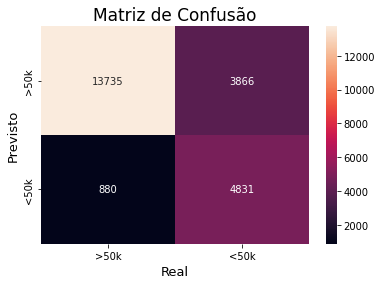

              precision    recall  f1-score   support

           0       0.94      0.78      0.85     17601
           1       0.56      0.85      0.67      5711

    accuracy                           0.80     23312
   macro avg       0.75      0.81      0.76     23312
weighted avg       0.85      0.80      0.81     23312



In [131]:
plot_confusion_matrix_and_evaluation_metrics(y_train_,y_pred)
print(classification_report(y_train_, y_pred))

##### Validando com dados de teste

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      8752
           1       0.54      0.84      0.66      2742

    accuracy                           0.79     11494
   macro avg       0.74      0.81      0.76     11494
weighted avg       0.85      0.79      0.81     11494




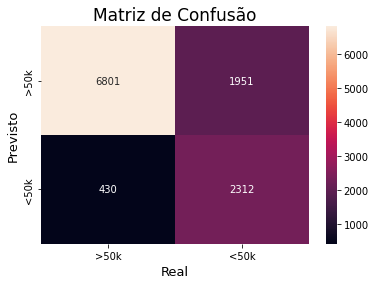

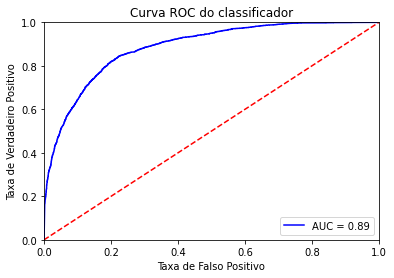

Threshold ideal: 0.52 para curva ROC



<span style='color:None'>**Acurácia** antes e depois do *thresholding*: 0.79, 0.79</span>

<span style='color:None'>**Precisão** antes e depois do  *thresholding*: 0.54, 0.54</span>

<span style='color:None'>**Recall** Score antes e depois do *thresholding*: 0.84, 0.84</span>

<span style='color:None'>**F1 Score** antes e depois do *thresholding*: 0.66, 0.66</span>

<span style='color:None'>**ROC Score** antes e depois do *thresholding*: 0.81, 0.81</span>

In [132]:
show_ROC_and_default_metrics(model,X_test_,y_test_)

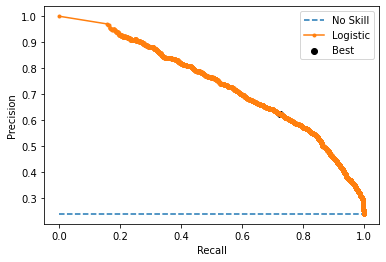

<span style='color:None'>Threshold ideal: 0.99 para curva Precision x Recall,F-Score=0.67</span>

<span style='color:None'>**Acurácia** antes e depois do *thresholding*: 0.79, 0.83</span>

<span style='color:None'>**Precisão** antes e depois do  *thresholding*: 0.54, 0.62</span>

<span style='color:None'>**Recall** Score antes e depois do *thresholding*: 0.84, 0.73</span>

<span style='color:None'>**F1 Score** antes e depois do *thresholding*: 0.66, 0.67</span>

<span style='color:None'>**ROC Score** antes e depois do *thresholding*: 0.81, 0.79</span>

In [133]:
show_precision_recall_curve_and_default_metrics(model,"GaussianNB",X_test_,y_test_)

### Comparando os modelos

ref.
 - https://plotly.com/python/px-arguments/
 - https://www.analyticsvidhya.com/blog/2021/10/interactive-plots-in-python-with-plotly-a-complete-guide/

In [134]:
model_results

[('KNN', 0.8480076561684357, 0.8131671393730405, 0.7009073788734805),
 ('LogisticRegression',
  0.8400904819906038,
  0.8161075530344549,
  0.696799736060706),
 ('LGBMClassifier',
  0.8733252131546894,
  0.8381815739188757,
  0.7438423645320198),
 ('XGBClassifier', 0.8755872629197843, 0.8375382282111697, 0.7457325746799431),
 ('RandomForest', 0.8470506351139725, 0.828316286901433, 0.711992136304063),
 ('SVM', 0.861057943274752, 0.7767830414421477, 0.6788658757289362),
 ('MLPClassifier', 0.8483556638246041, 0.8166513487132919, 0.7040244523688233),
 ('GaussianNB', 0.8306072733600139, 0.7947289238962739, 0.6716141001855287)]

In [135]:
#dataset = pd.DataFrame({'Column1': model_results[0][0], 'Column2': model_results[0][1]})
df = pd.DataFrame.from_records(model_results)
df = df.rename(columns={0: 'Modelo', 1: 'Acurácia', 2: 'AUCROC', 3: 'F1-Score'})
df

Modelo  Acurácia    AUCROC  F1-Score
0                 KNN  0.848008  0.813167  0.700907
1  LogisticRegression  0.840090  0.816108  0.696800
2      LGBMClassifier  0.873325  0.838182  0.743842
3       XGBClassifier  0.875587  0.837538  0.745733
4        RandomForest  0.847051  0.828316  0.711992
5                 SVM  0.861058  0.776783  0.678866
6       MLPClassifier  0.848356  0.816651  0.704024
7          GaussianNB  0.830607  0.794729  0.671614

In [136]:
import plotly.express as px
fig = px.scatter(df, y="Acurácia", x="Modelo", color="Modelo", symbol="Modelo")
fig.update_traces(marker_size=10)

In [137]:
# Use column names instead. This is the same chart as above.
fig = px.scatter(df, x='Acurácia', y='F1-Score', color='Modelo', size='AUCROC')
fig.show()

### Considerações finais para implementação do classificador

 - Todas as métricas aqui exibidas foram computadas nos dados de testes, ou seja, aqueles __não__ utilizados no treino dos classificadores.
 - Observa-se que os classificadores de árvore de decisão __XGBoost e LGBM__ foram superiores aos demais. Em seguida vemos o também baseado em árvore __Randon Forest__ com acurácia um pouco pior que o __SVM__, que 'perde' pelo fato de ter o F1-Score, isto é, Precision x Recal, menor. Em seguida, temos a tríade __KNN__, __Rede neural__ e __Regressão Logística__ com desempenho similar e finalmente o __Naive Bayes__ embora seu desempeho não seja tão ruim, com acurácia de 83%.
 - O tratamento de nulls apresentado, drop ou preenchimento por moda, não apresentaram ganhos significativos, acredito que por conta do volume de registros nessa situação ser baixo.
  - Os hiperparametros aqui apresentados foram reduzidos conforme testes anteriores devido o tempo de processamento. Ao longo dos experimentos utilizei bem mais que o apresentado aqui.
 - Maiores detalhes sobre a codificação, ver em: https://github.com/cazevedo1977/academico/tree/main/doutorado/disciplinas/PCS5024%20-%20Aprendizado%20Estatistico/homework1 